In [1]:
import itertools
import random
import numpy 
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path 
import sys
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import warnings
from tabulate import tabulate
warnings.filterwarnings("ignore")

In [2]:
## Read all datasets for every hole size, splitted by starting year, and plot them
YEARS = [str(year) for year in range(1990,2019)]
collaborations_df = pd.read_csv('myDATA/00-collaboration_df_with_starting_years.csv')
min_size = 1
max_size = 28

In [3]:
def get_tot_auths_num():
    file = 'myDATA/00-collaboration_df_with_starting_years.csv'
    collaborations_df = pd.read_csv(file)
    num_auths_by_y = []
    num_new_auths_by_y = []
    YEARS = [str(year) for year in range(1990,2019)]  
    tot_auth = 0
    for i in range(len(YEARS)):
        y = YEARS[i]
        
        # number of new authors in the given year
        num_new_auths_by_y.append(len(collaborations_df.loc[collaborations_df["start_year"] == int(y)]))
        
        # total number of new authors in the given year
        tot_auth += num_new_auths_by_y[i]                         
        num_auths_by_y.append(tot_auth)
    return num_auths_by_y

def get_f_by_auth(df):
    tot_auths = get_tot_auths_num()
    x=[]
    y=[]
    for i in df:
        if(i!="ID"):
            y.append(df[i].mean())
            j=YEARS.index(str(i))
            x.append(tot_auths[j])
            
    return x,y

In [4]:
# return a vector containig the total number of collaboration for each year
def get_tot_collabs_num():
    file = 'myDATA/00-collaboration_df_with_starting_years.csv'
    collaborations_df = pd.read_csv(file)
    num_colls_by_y = []
    YEARS = [str(year) for year in range(1990,2019)]  
    tot_auth = 0
    for i in range(len(YEARS)):
        y = YEARS[i]
        # total number of collaborations in the given year
        num_colls_by_y.append(collaborations_df[y].sum())
    return num_colls_by_y

def get_f_by_colls(df):
    
    tot_colls = get_tot_collabs_num()
    x=[]
    y=[]
    for i in df:
        if(i!="ID"):
            y.append(df[i].mean())
            j=YEARS.index(str(i))
            x.append(tot_colls[j])
            
    return x,y

In [5]:
# return a vector containig the total number of publication for each year
def get_tot_pubs_num():
    file = 'myDATA/02-publication_df_with_starting_years.csv'
    publication_df = pd.read_csv(file)
    num_colls_by_y = []
    YEARS = [str(year) for year in range(1990,2019)]  
    tot_auth = 0
    for i in range(len(YEARS)):
        y = YEARS[i]
        # total number of publication in the given year
        if(i==0):
            num_colls_by_y.append(publication_df[y].sum())
        else:
            num_colls_by_y.append(publication_df[y].sum() + num_colls_by_y[i-1])

    return num_colls_by_y

def get_f_by_pubs(df):
    
    tot_pubs = get_tot_pubs_num()
    x=[]
    y=[]
    for i in df:
        if(i!="ID"):
            y.append(df[i].mean())
            j=YEARS.index(str(i))
            x.append(tot_pubs[j])
            
    return x,y

In [6]:
# computer error between each fitted curve and real data
def err_calc_logfit(y, y1):
    err = 0
    for i in range(len(y)):
        err += pow(abs(y[i] - y1[i]), 2)
    return err

def tot_err_logfit(x_y_fit):
    total_error = 0
    for y in YEARS[:-1]:
        err = err_calc_logfit(x_y_fit[y]["y"], x_y_fit[y]["fit_y"])
        total_error += err
    return str(total_error)

# compute error for the general function 
def err_calc(y, y1):
    err = 0
    for i in range(len(y)):
        err += pow(abs(y[i] - y1[i]), 2)
    return err

def tot_err(alpha, sigma):
    total_error = 0
    for y in YEARS[:-1]:
        err = err_calc(x_y_fit[y]["y"],best_g(x_y_fit[y]["x"], alpha, sigma))
        total_error += err
    return str(total_error)

def func1(t, tv, a, sigma):
    return a* pow((np.log(t/tv) + 1), sigma)

def best_g(xdata, alpha, sigma):
    y = []
    for x in xdata:
        y.append(func1(x, xdata[0], alpha, sigma))
    return y

In [7]:
# find the best values for alpha and sigma
import scipy.optimize as optimize

def f(params):
    alpha, sigma = params
    tot = 0
    for v in YEARS[:-1]:
        t_v = x_y_fit[v]["x"][0]
        for i in range(len(x_y_fit[v]["x"])):
            t_i = x_y_fit[v]["x"][i]
            f = x_y_fit[v]["y"][i]
            tot += pow(abs(f - alpha * pow((np.log(t_i/t_v) + 1), sigma)), 2)
    
    return tot

================================================================ HOLE SIZE 1 =================================================================


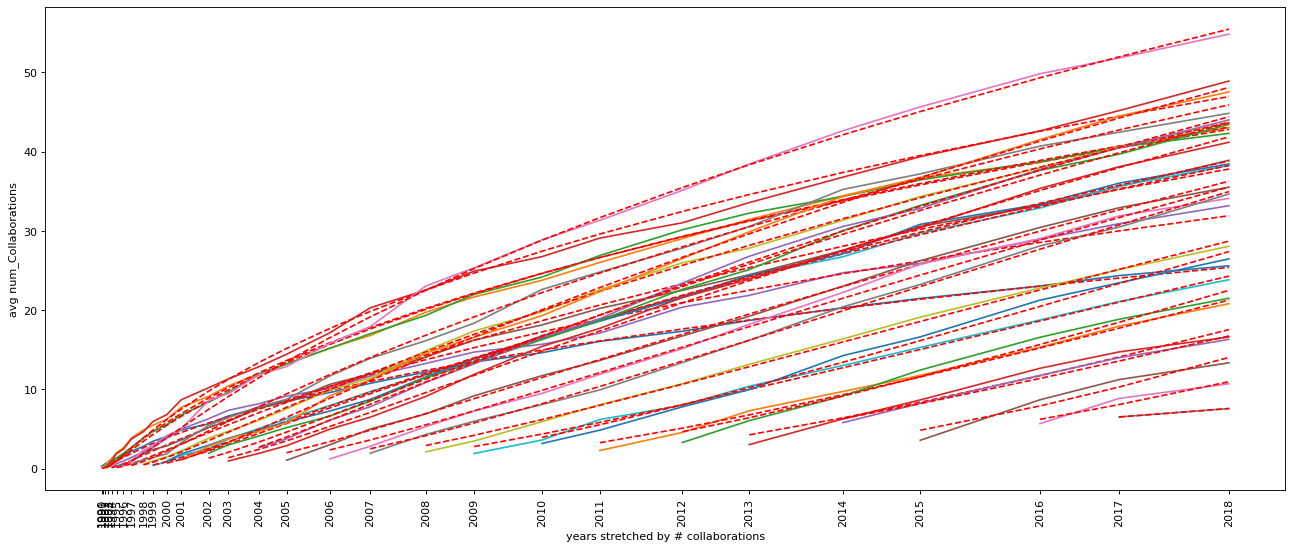

total error for all fitted curves 122.8180401222645


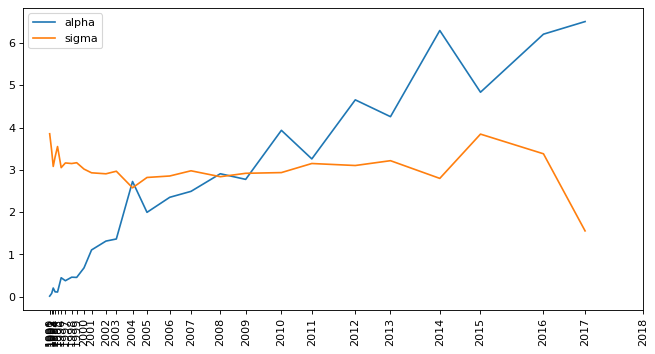

  Sarting Year      alpha    sigma
--------------  ---------  -------
          1990  0.0118949  3.85334
          1991  0.0374623  3.68901
          1992  0.0774668  3.44761
          1993  0.203102   3.0804
          1994  0.113253   3.30335
          1995  0.108768   3.55056
          1996  0.446736   3.0516
          1997  0.376532   3.16263
          1998  0.459725   3.14889
          1999  0.454745   3.16802
          2000  0.680256   3.01732
          2001  1.10439    2.92922
          2002  1.31389    2.90598
          2003  1.36367    2.96655
          2004  2.72389    2.57455
          2005  1.99424    2.81892
          2006  2.34984    2.85393
          2007  2.49052    2.97705
          2008  2.907      2.83709
          2009  2.77385    2.91749
          2010  3.93424    2.93454
          2011  3.25826    3.14932
          2012  4.65518    3.10196
          2013  4.25758    3.21608
          2014  6.29613    2.79716
          2015  4.83592    3.84465
          2016  6.2090

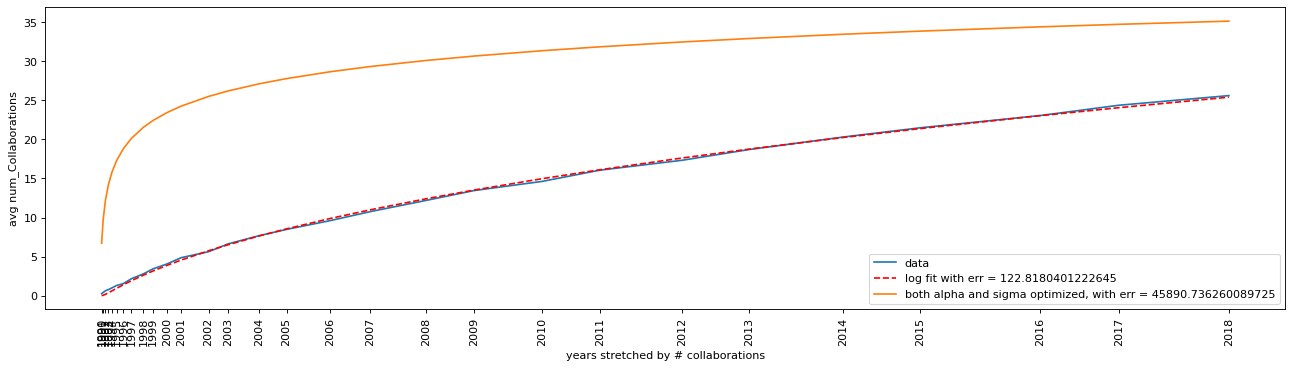

============================================================= starting year 1991 =============================================================


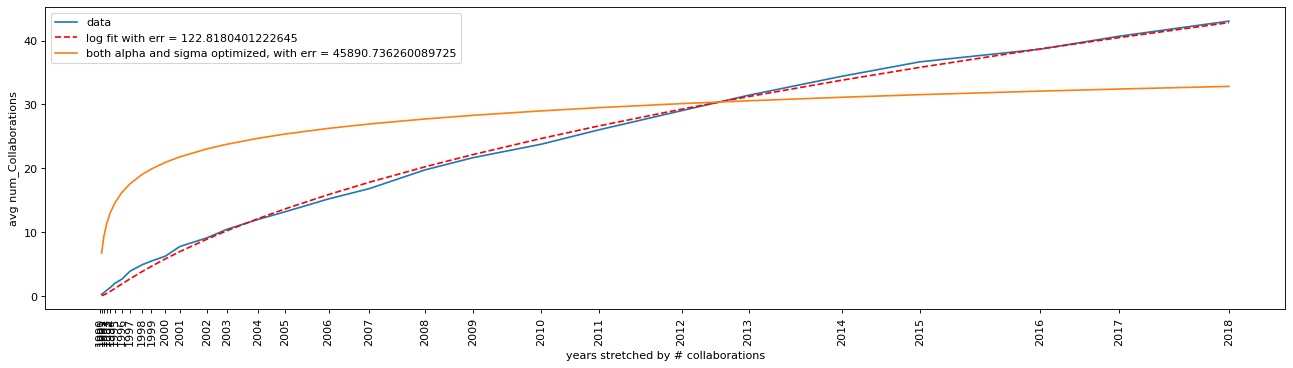

============================================================= starting year 1992 =============================================================


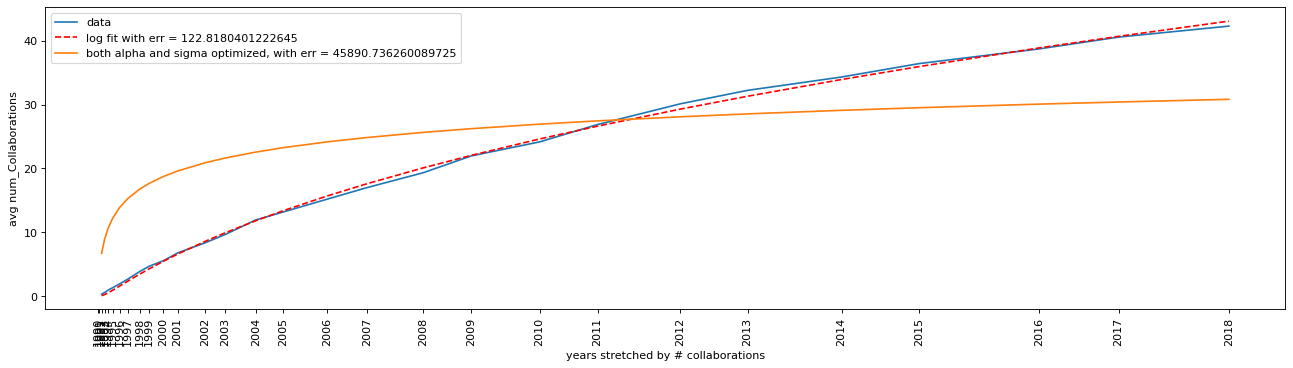

============================================================= starting year 1993 =============================================================


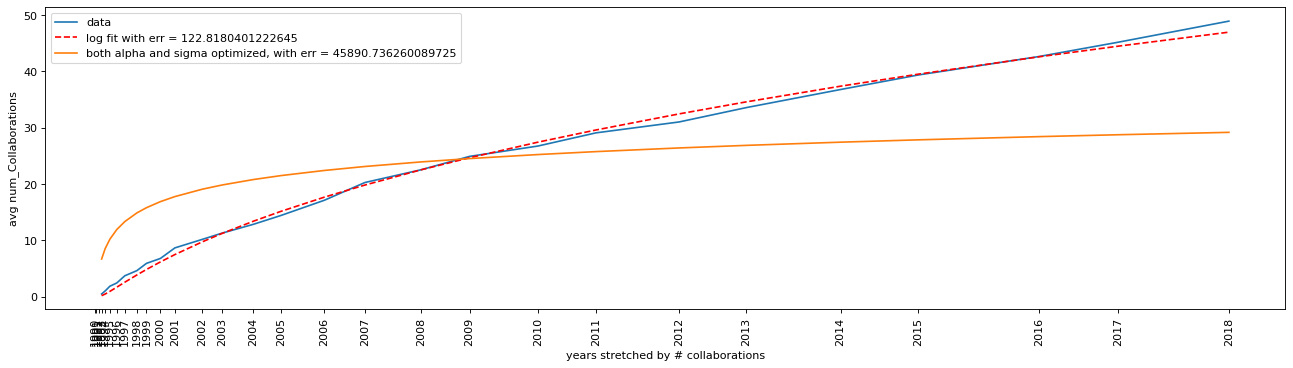

============================================================= starting year 1994 =============================================================


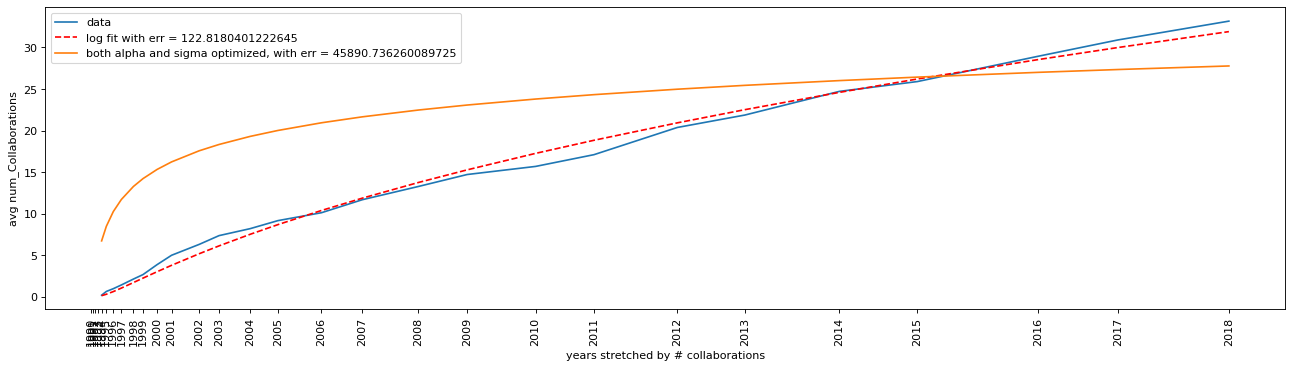

============================================================= starting year 1995 =============================================================


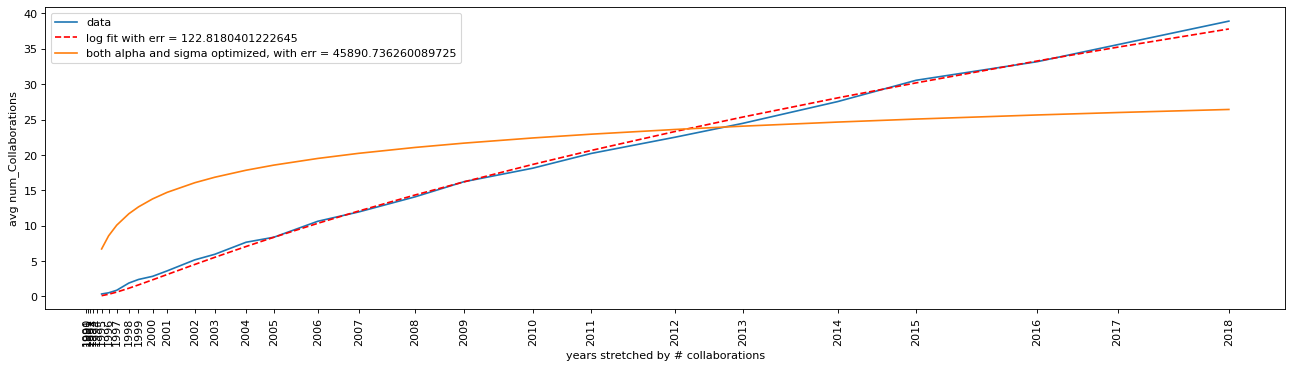

============================================================= starting year 1996 =============================================================


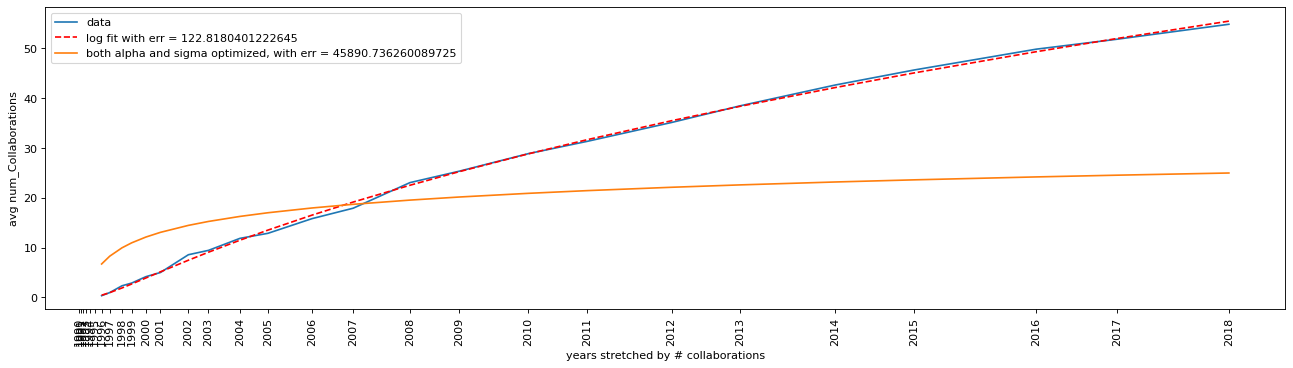

============================================================= starting year 1997 =============================================================


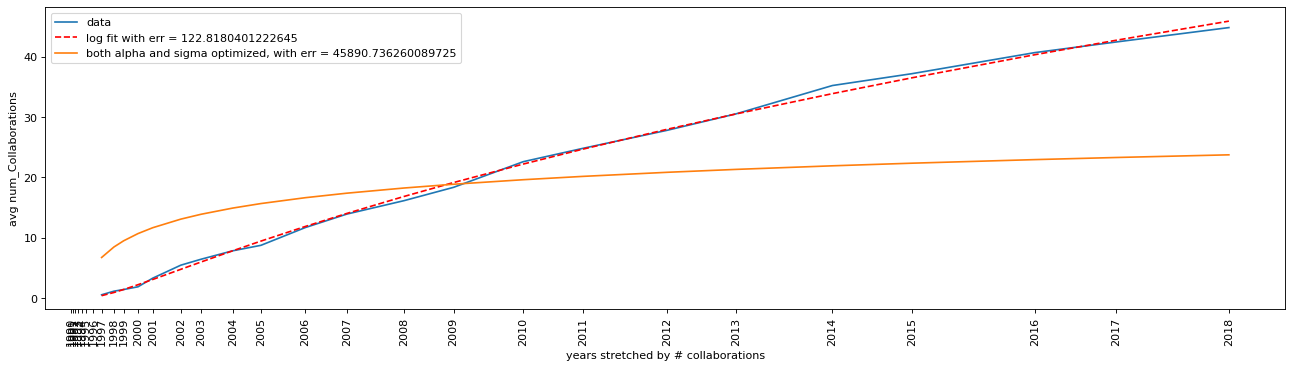

============================================================= starting year 1998 =============================================================


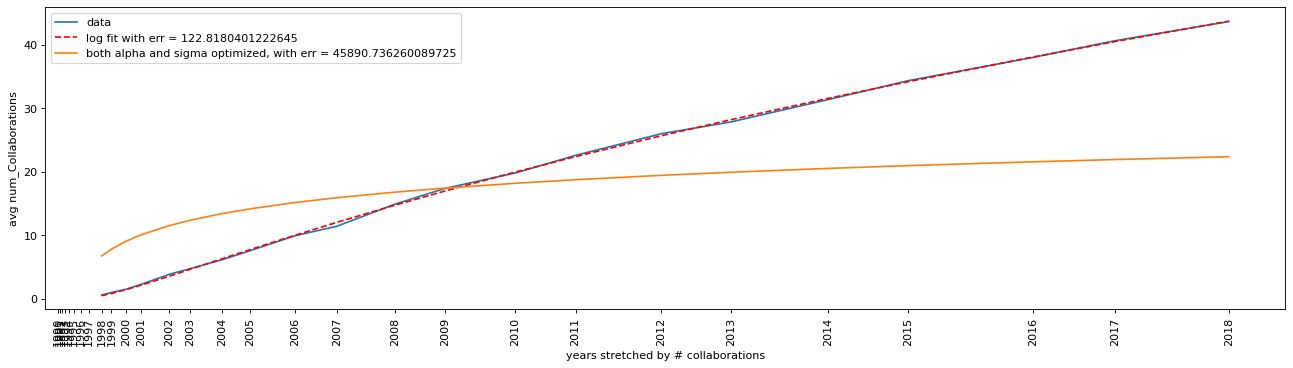

============================================================= starting year 1999 =============================================================


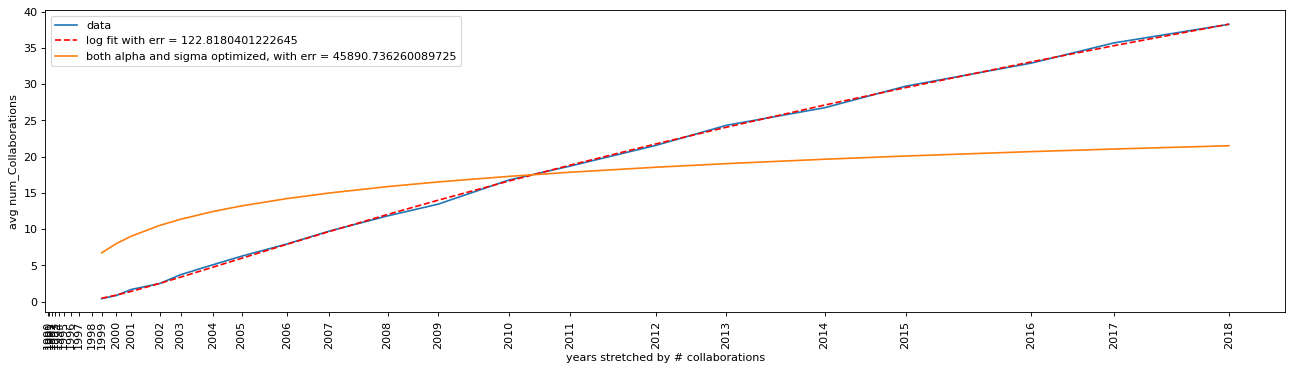

============================================================= starting year 2000 =============================================================


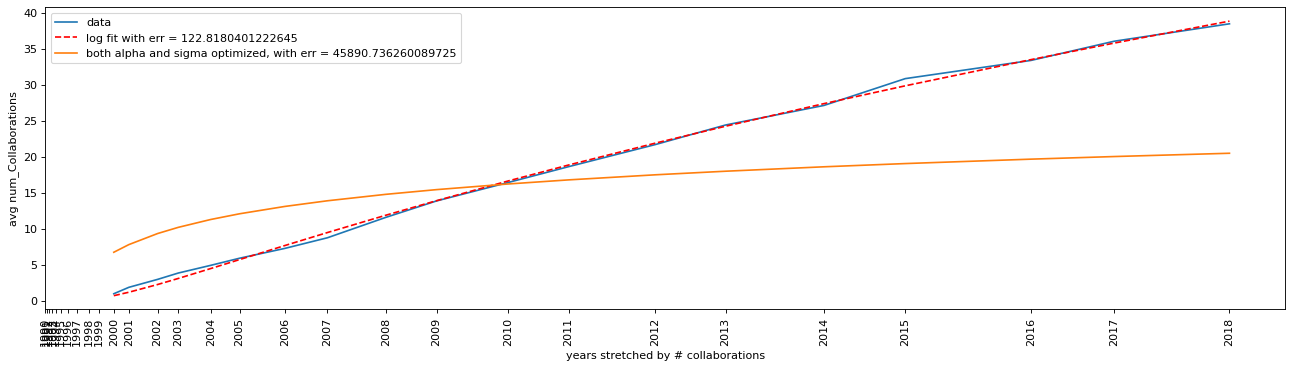

============================================================= starting year 2001 =============================================================


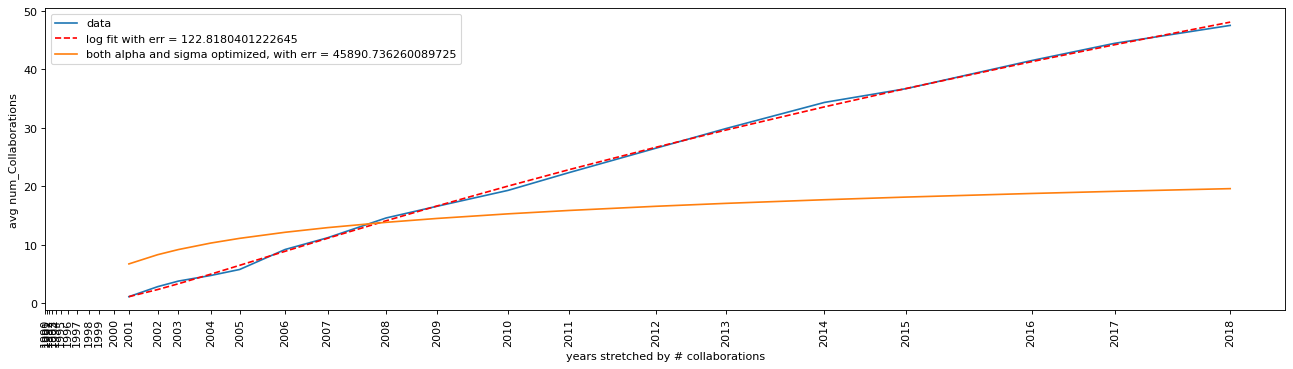

============================================================= starting year 2002 =============================================================


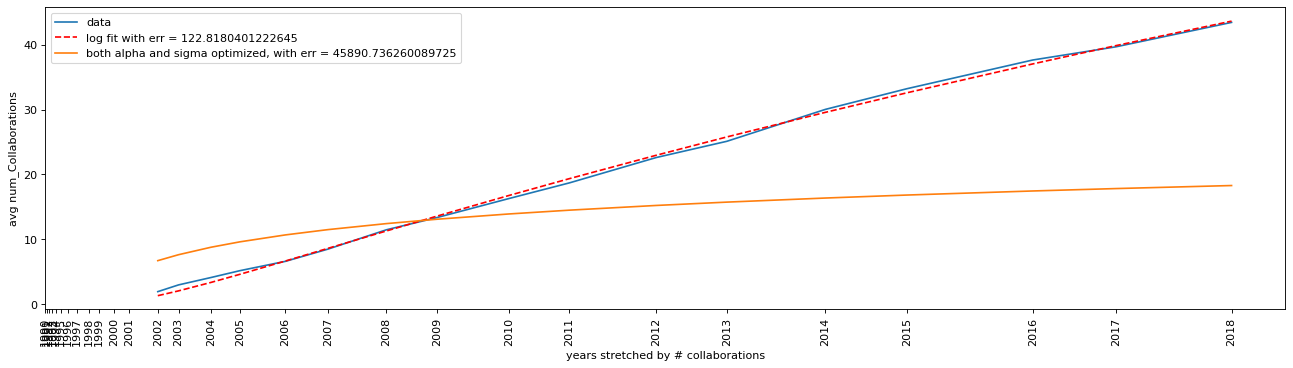

============================================================= starting year 2003 =============================================================


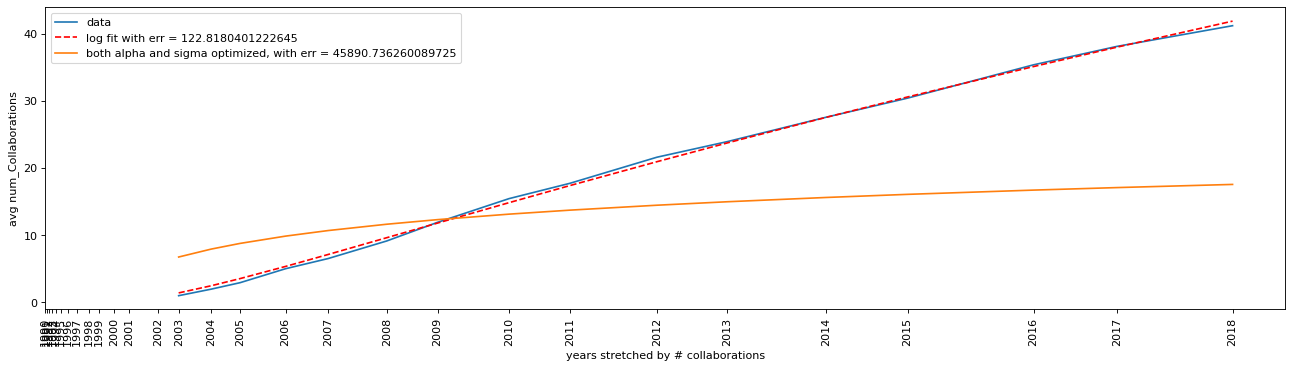

============================================================= starting year 2004 =============================================================


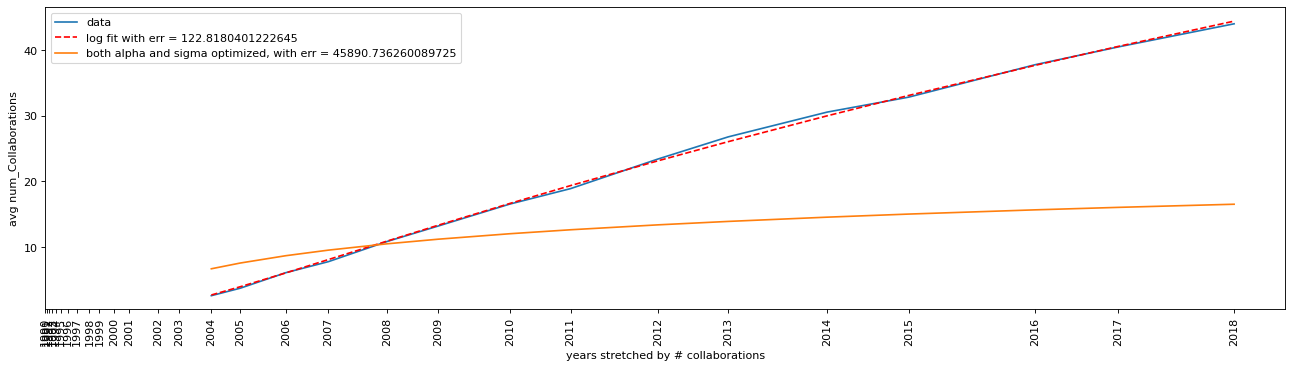

============================================================= starting year 2005 =============================================================


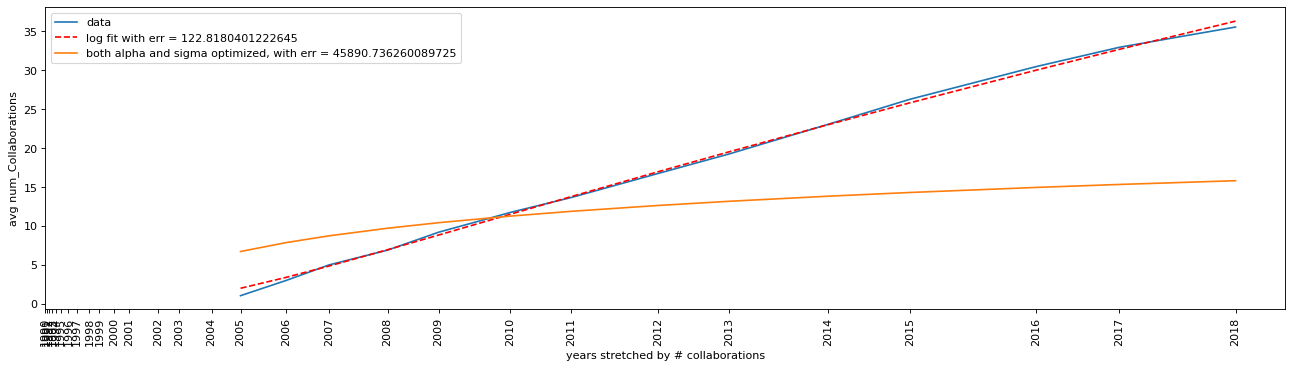

============================================================= starting year 2006 =============================================================


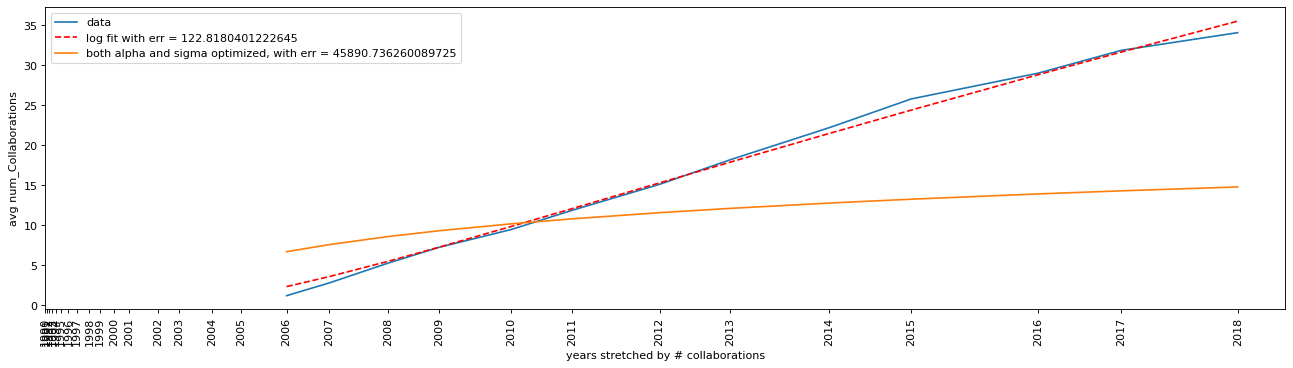

============================================================= starting year 2007 =============================================================


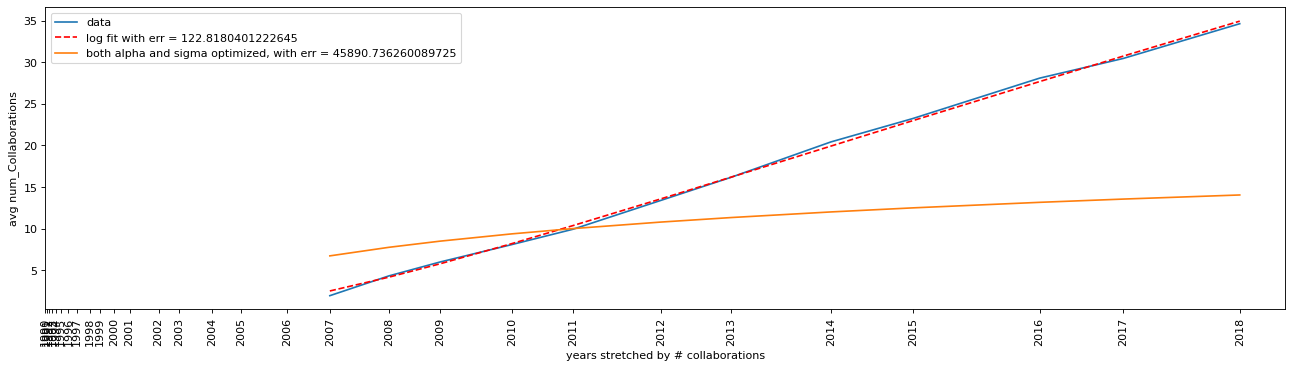

============================================================= starting year 2008 =============================================================


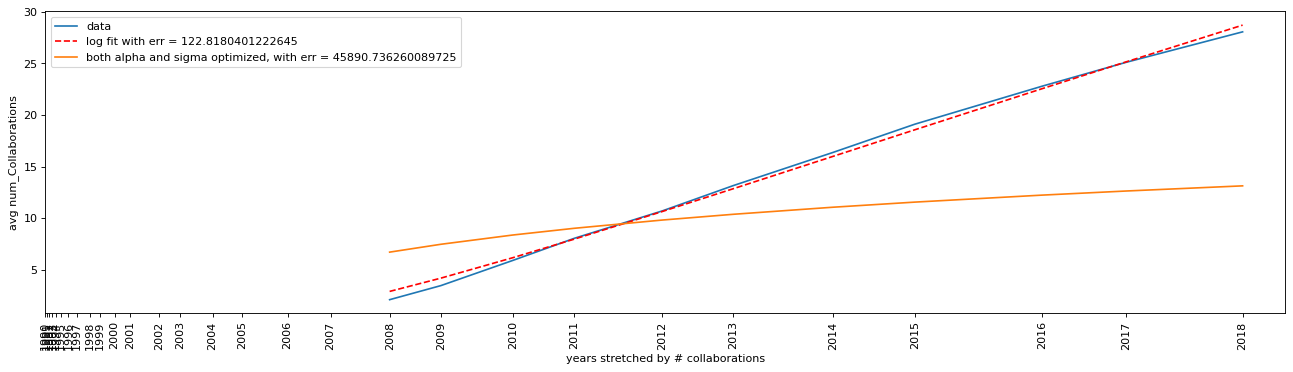

============================================================= starting year 2009 =============================================================


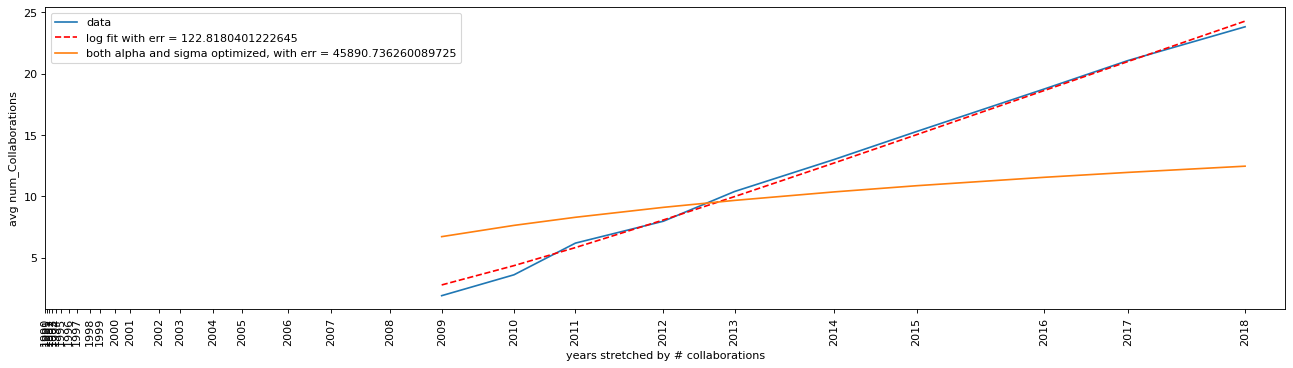

============================================================= starting year 2010 =============================================================


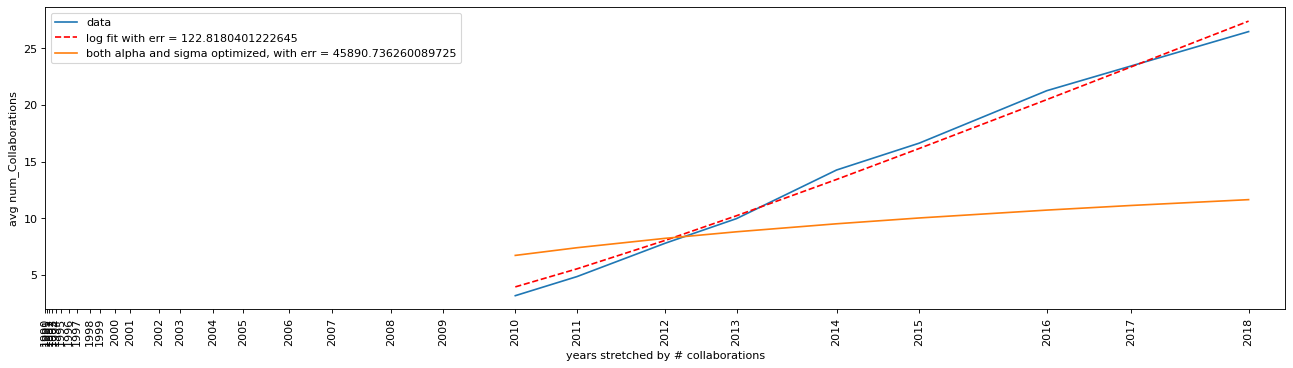

============================================================= starting year 2011 =============================================================


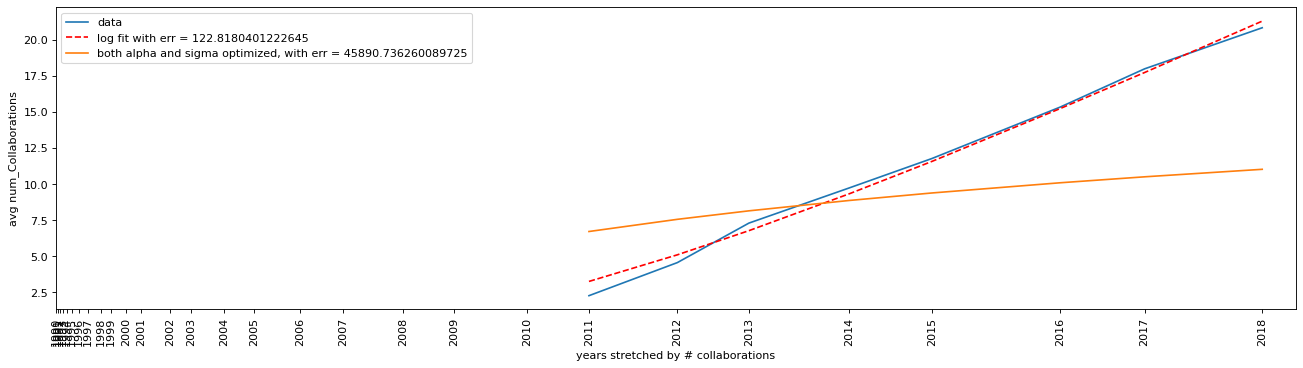

============================================================= starting year 2012 =============================================================


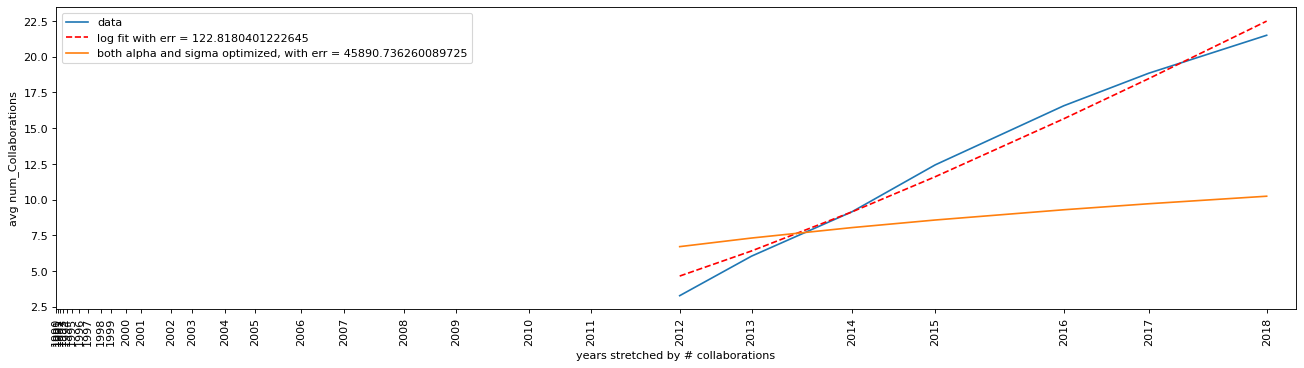

============================================================= starting year 2013 =============================================================


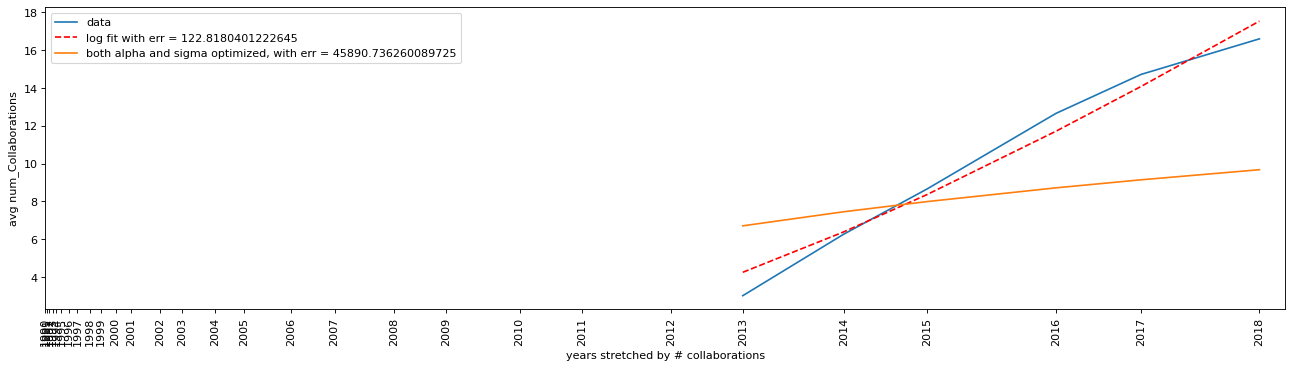

============================================================= starting year 2014 =============================================================


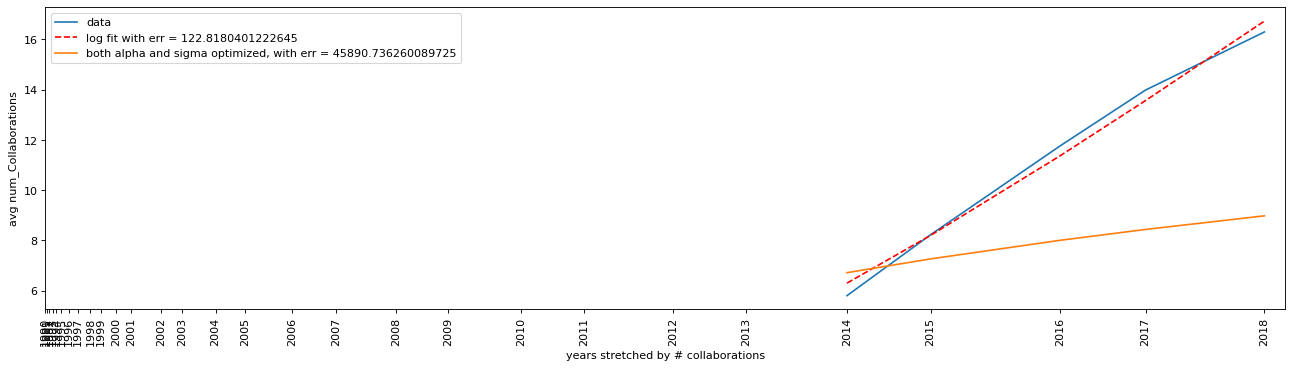

============================================================= starting year 2015 =============================================================


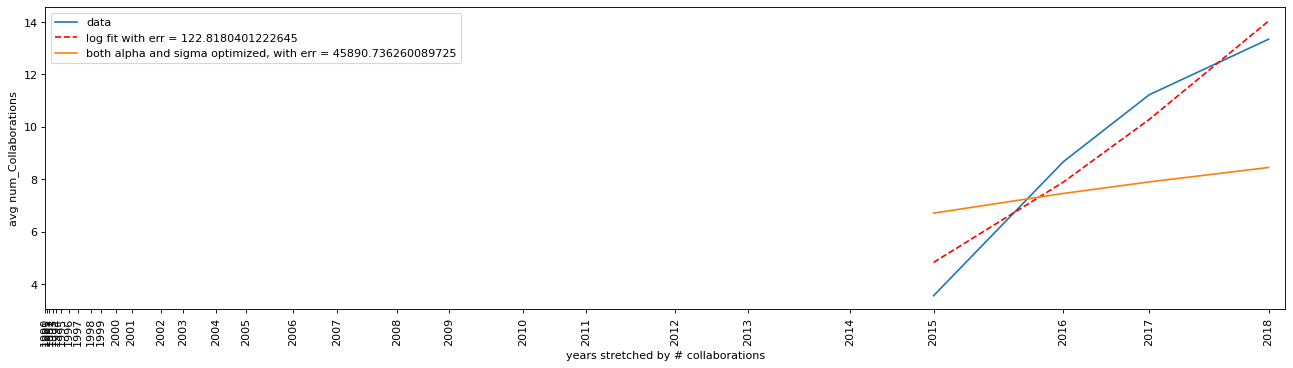

============================================================= starting year 2016 =============================================================


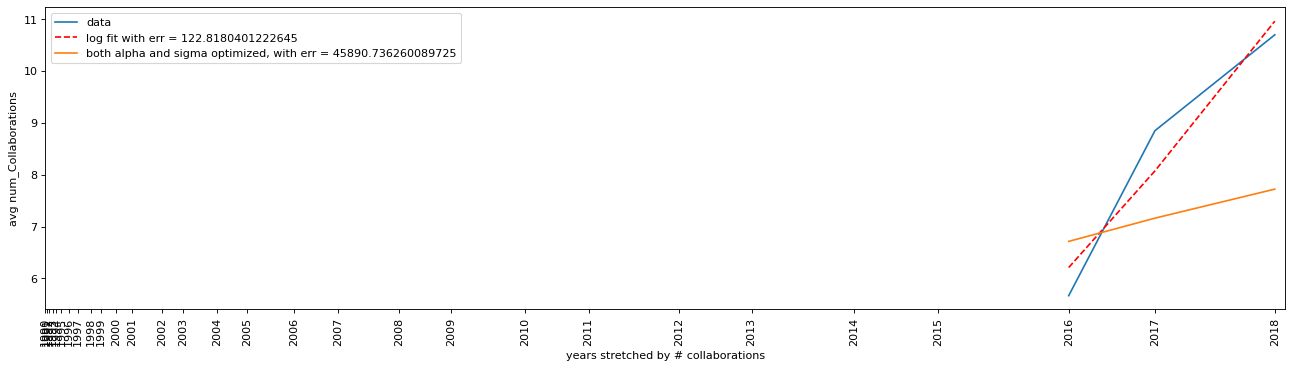

============================================================= starting year 2017 =============================================================


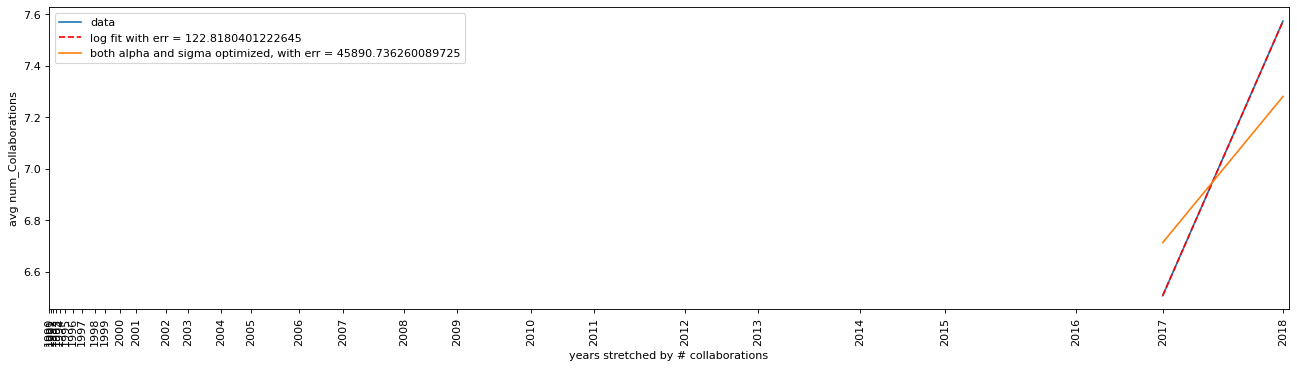

In [8]:
alphas  = []
sigmas = []

def func(t, a, sigma):
    return a* pow((np.log(t) + 1), sigma)

def plot_f_fit(xdata, ydata, curr_x):
    popt, pcov = curve_fit(func, [x/curr_x for x in xdata], ydata, maxfev=5000)
    alphas.append(popt[0])
    sigmas.append(popt[1])
    #print("alpha", popt[0], ", sigma", popt[1])
    return func([x/curr_x for x in xdata], *popt)

# Plot fitting function of average trajectories for each starting year and hole lenght stretched by new collaborations
for size in range(min_size, max_size+1):
    alphas  = []
    sigmas = []
    x_y_fit = {}
    
    print((' \033[1m' + "HOLE SIZE "+str(size) + '\033[0m ').center(150, '='))
    path = 'myDATA/10-splitted_by_year/'+str(size)+'_hole_size_splitted'
    if(os.path.exists(path)):
        for y in YEARS:
            file=path+'/'+y+'_collabs_by_starting_year.csv'
            if(os.path.exists(file) and y!="2018"):
                df_y = pd.read_csv(file)
                if(len(df_y)>0):
                    png_path = "myDATA/10-splitted_by_year/"+str(size)+"_hole_size_splitted/trajectories_avg_plt/"+"_holeSize_"+str(size)+"by_num_collaborations_log_fittings_all"+".png"

                    curr_x = get_tot_collabs_num()[YEARS.index(y)]
                    x_axis, y_axis = get_f_by_colls(df_y)  
                    #print(y, end=" -> ")
                    fit_y = plot_f_fit(x_axis, y_axis, curr_x)
     
                    x_y_fit[y] = {"x":x_axis, "y":y_axis, "fit_y":fit_y }
    
    plt.figure(figsize=(20, 8), dpi=80)

    for y in YEARS[:-1]:
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["y"])
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["fit_y"], 'r--')
        
    plt.xlabel("years stretched by # collaborations")
    plt.ylabel("avg num_Collaborations")
    plt.xticks(rotation='vertical')
    plt.xticks(get_tot_collabs_num(), YEARS)

    plt.savefig(png_path)
    plt.show()
    data = []
    for i in range(len(YEARS) - 1):
        data.append([YEARS[i], alphas[i], sigmas[i]])
    print("total error for all fitted curves", tot_err_logfit(x_y_fit))
    
    
    
    plt.figure(figsize=(10, 5), dpi=80)
    plt.plot(get_tot_collabs_num()[:-1], alphas, label="alpha")
    plt.plot(get_tot_collabs_num()[:-1], sigmas, label="sigma")
    plt.xticks(get_tot_collabs_num(), YEARS)
    plt.xticks(rotation='vertical')

    plt.legend()
    plt.show()
    print (tabulate(data, headers=["Sarting Year", "alpha", "sigma"]))
    
    initial_guess = [1, 1]
    result = optimize.minimize(f, initial_guess)
    fitted_params = result.x
    
    ## both optimized values 
    alpha = fitted_params[0]
    sigma = fitted_params[1]
    print("optimized ", alpha, sigma)
    ## fixing alpha to the mean 
    # alpha_mean = np.mean(alphas) # mean
    # sigma1 = 1.5135571015789293 # for hole size 1

    ## fixing sigma to the mean 
    #sigma_mean = np.mean(sigmas) # mean 
    #alpha1 = 0.138066456038629  # for hole size 1

    for y in YEARS[:-1]:
        print((' \033[1m' + "starting year "+str(y) + '\033[0m ').center(150, '='))
        plt.figure(figsize=(20, 5), dpi=80)

        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["y"], label="data")
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["fit_y"], 'r--', label="log fit with err = "+tot_err_logfit(x_y_fit))
        plt.plot(x_y_fit[y]["x"], best_g(x_y_fit[y]["x"], alpha, sigma), label="both alpha and sigma optimized, with err = "+tot_err(alpha, sigma))
        #plt.plot(x_y_fit[y]["x"], best_g(x_y_fit[y]["x"], alpha_mean, sigma1), label="alpha fixed to mean and sigma optimized , with total err = "+tot_err(alpha_mean, sigma1))
        #plt.plot(x_y_fit[y]["x"], best_g(x_y_fit[y]["x"], alpha1, sigma_mean), label="sigma fixed to mean and alpha optimized , with total err = "+tot_err(alpha1, sigma_mean))

        plt.xlabel("years stretched by # collaborations")
        plt.ylabel("avg num_Collaborations")
        plt.xticks(rotation='vertical')
        plt.xticks(get_tot_collabs_num(), YEARS)
        plt.legend()
        
        fig_path = "myDATA/10-splitted_by_year/"+str(size)+"_hole_size_splitted/trajectories_avg_plt/" + str(y) + "_by_num_collaborations_alpha_sigma_log_fitting_generalized.png"
        plt.savefig(fig_path)
        plt.show()
    
    break

================================================================ HOLE SIZE 1 =================================================================


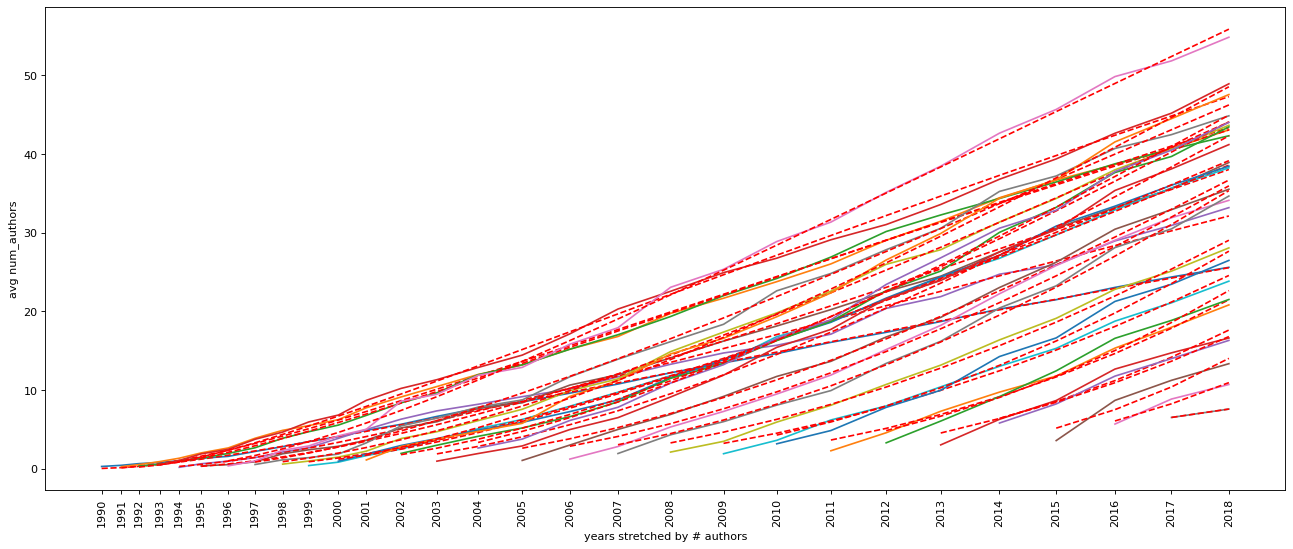

total error for all fitted curves 153.03748288964812


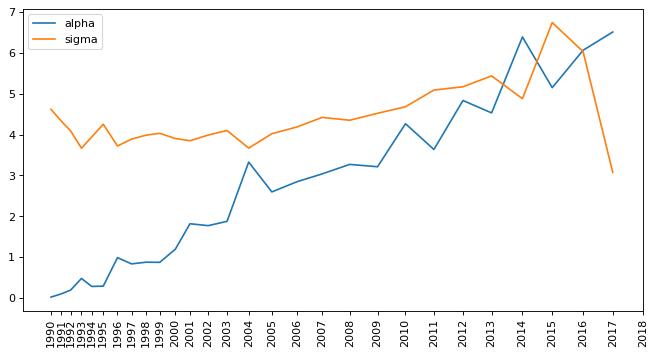

  Sarting Year      alpha    sigma
--------------  ---------  -------
          1990  0.0271625  4.6167
          1991  0.107856   4.32644
          1992  0.199211   4.0891
          1993  0.483648   3.66684
          1994  0.288188   3.94266
          1995  0.295762   4.25325
          1996  0.992598   3.72141
          1997  0.839229   3.88934
          1998  0.88064    3.98539
          1999  0.877256   4.0301
          2000  1.19728    3.90401
          2001  1.82022    3.84986
          2002  1.774      3.98793
          2003  1.87933    4.09986
          2004  3.32785    3.66917
          2005  2.59864    4.02088
          2006  2.8466     4.18507
          2007  3.0387     4.41935
          2008  3.27113    4.35015
          2009  3.21379    4.51992
          2010  4.26535    4.68052
          2011  3.63559    5.08866
          2012  4.83294    5.16868
          2013  4.52998    5.43426
          2014  6.38566    4.87781
          2015  5.14684    6.73769
          2016  6.06066

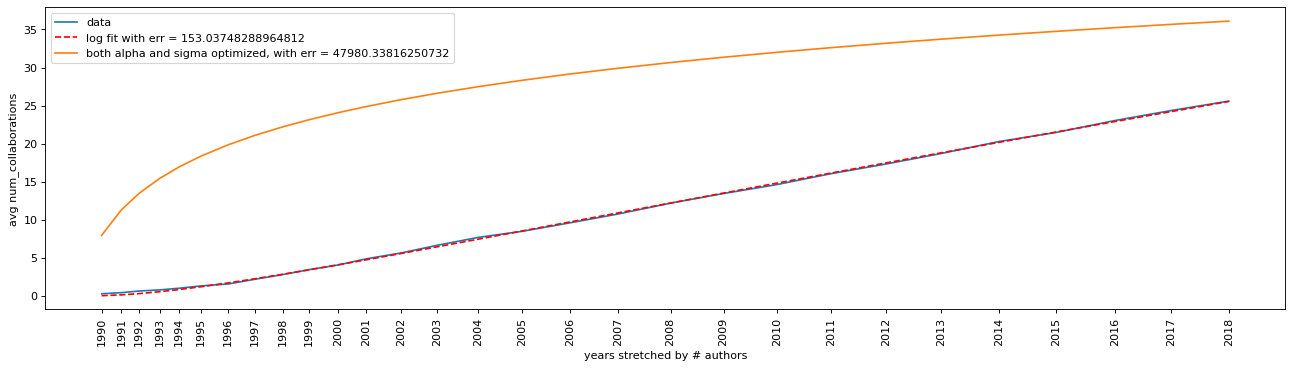

============================================================= starting year 1991 =============================================================


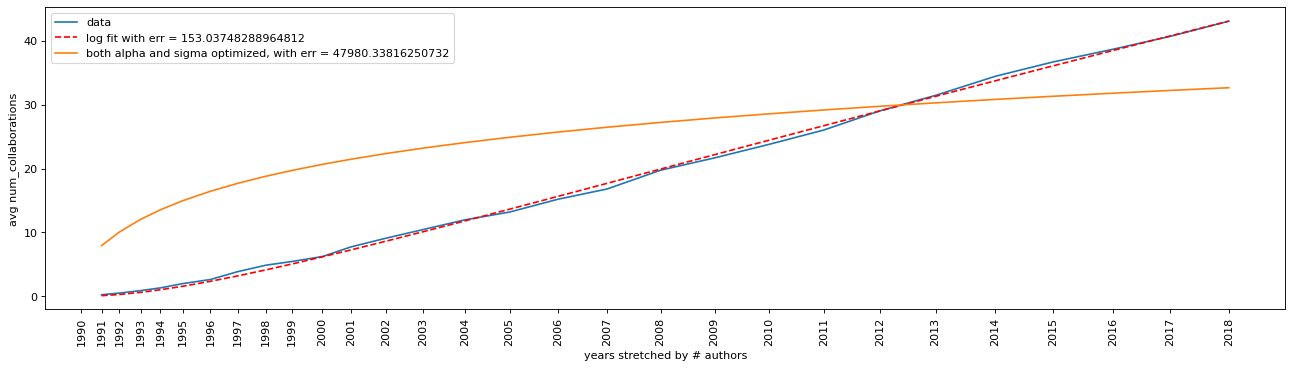

============================================================= starting year 1992 =============================================================


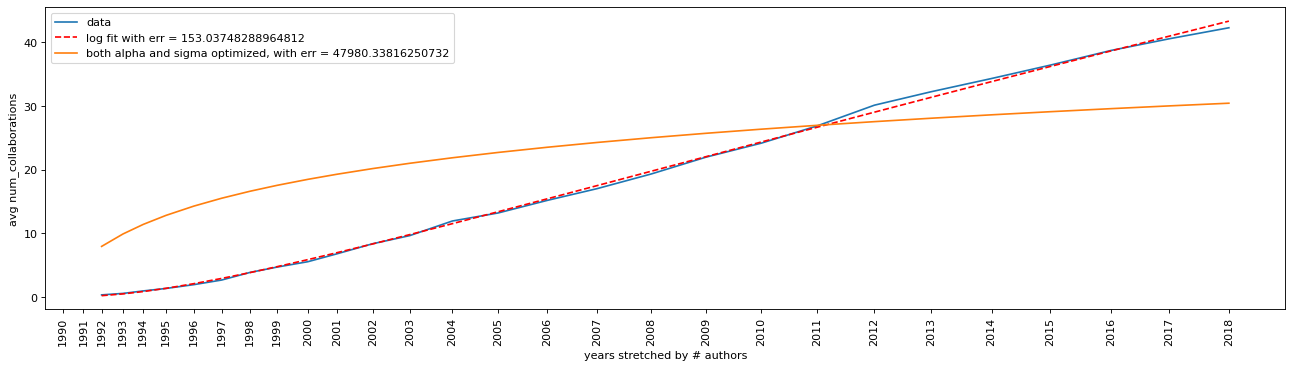

============================================================= starting year 1993 =============================================================


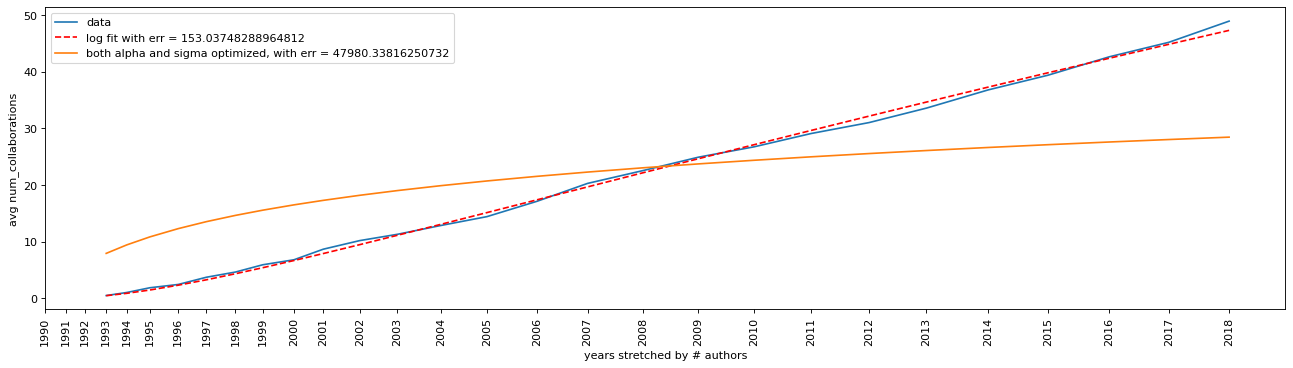

============================================================= starting year 1994 =============================================================


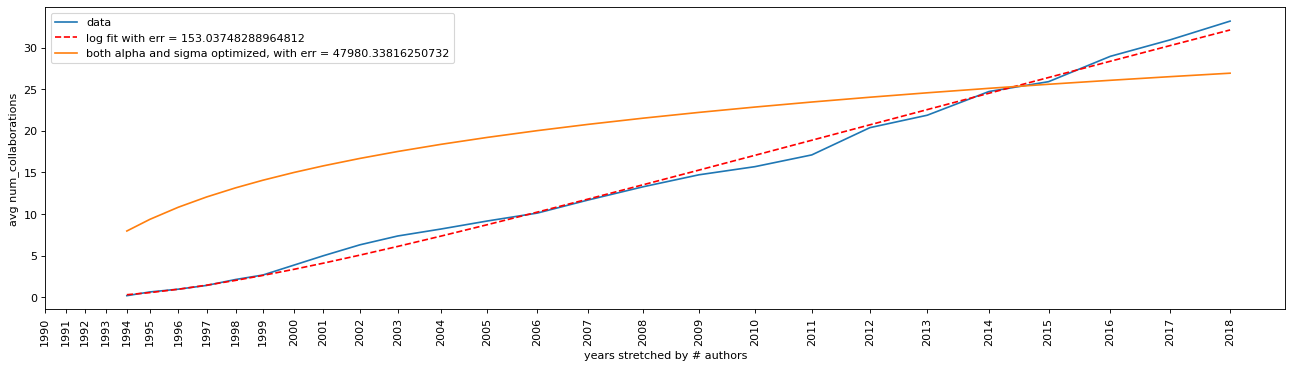

============================================================= starting year 1995 =============================================================


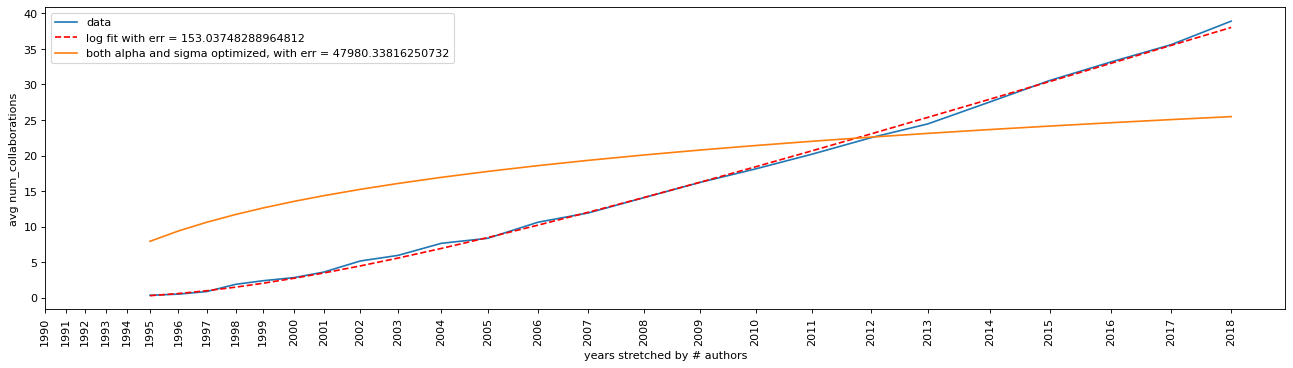

============================================================= starting year 1996 =============================================================


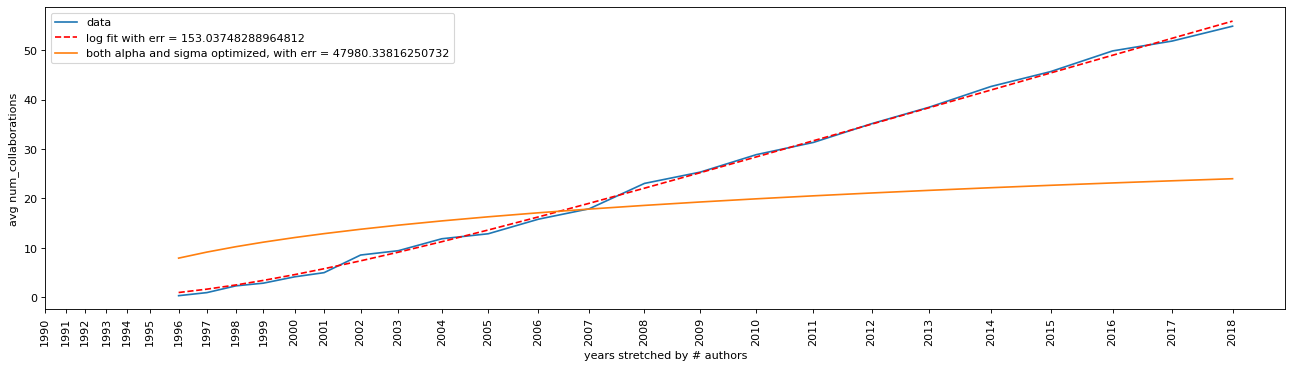

============================================================= starting year 1997 =============================================================


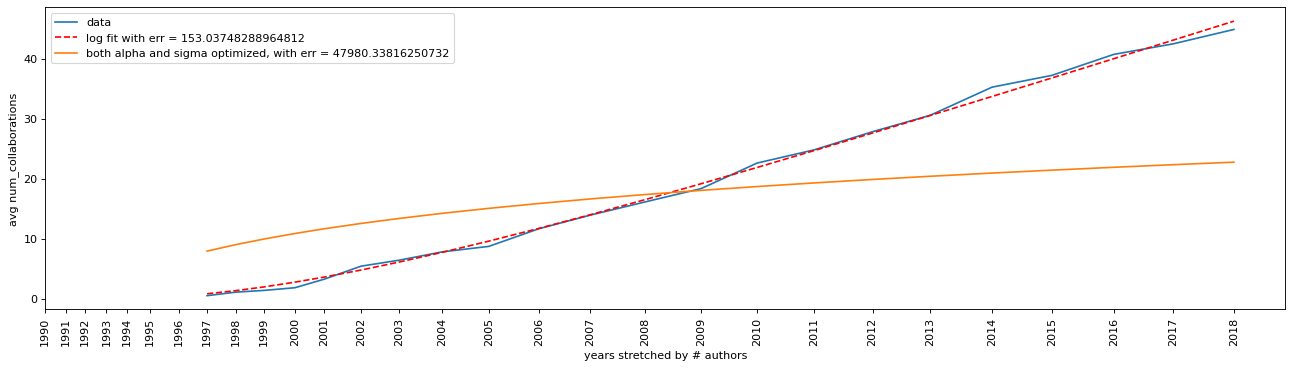

============================================================= starting year 1998 =============================================================


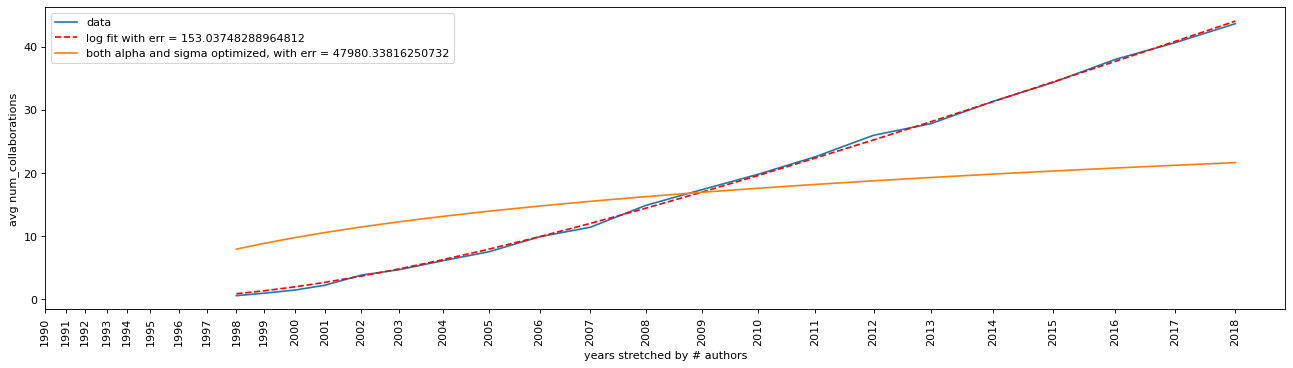

============================================================= starting year 1999 =============================================================


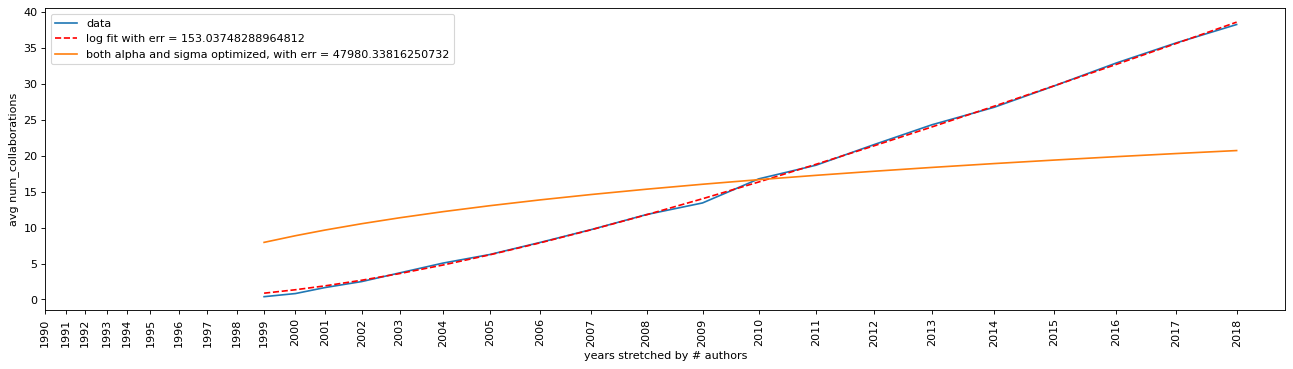

============================================================= starting year 2000 =============================================================


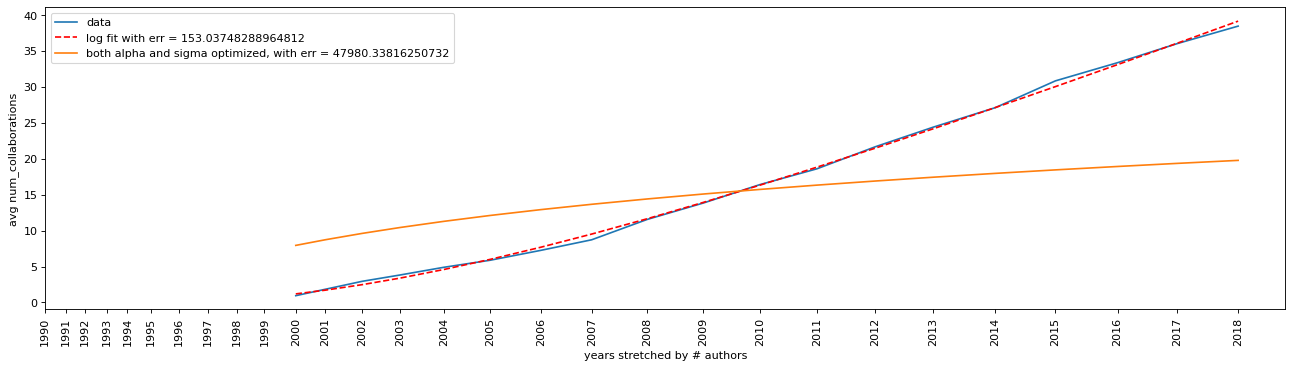

============================================================= starting year 2001 =============================================================


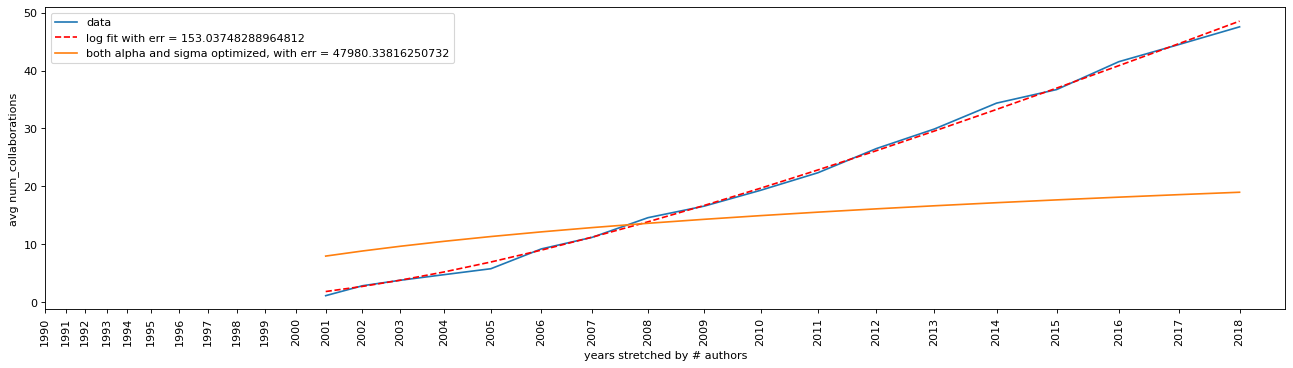

============================================================= starting year 2002 =============================================================


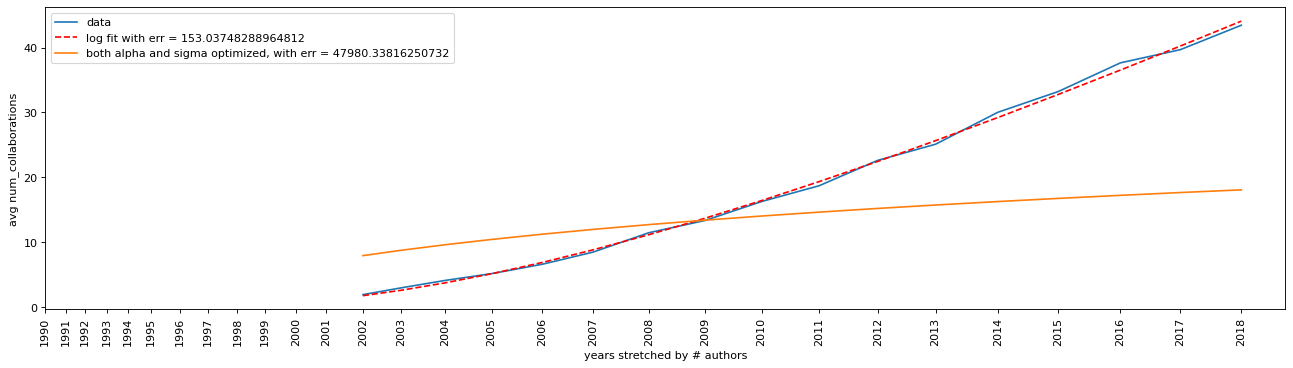

============================================================= starting year 2003 =============================================================


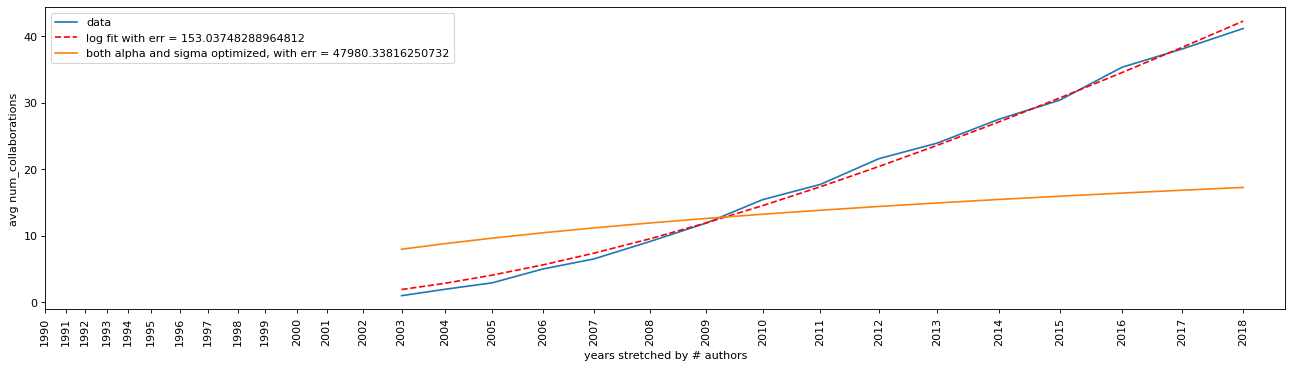

============================================================= starting year 2004 =============================================================


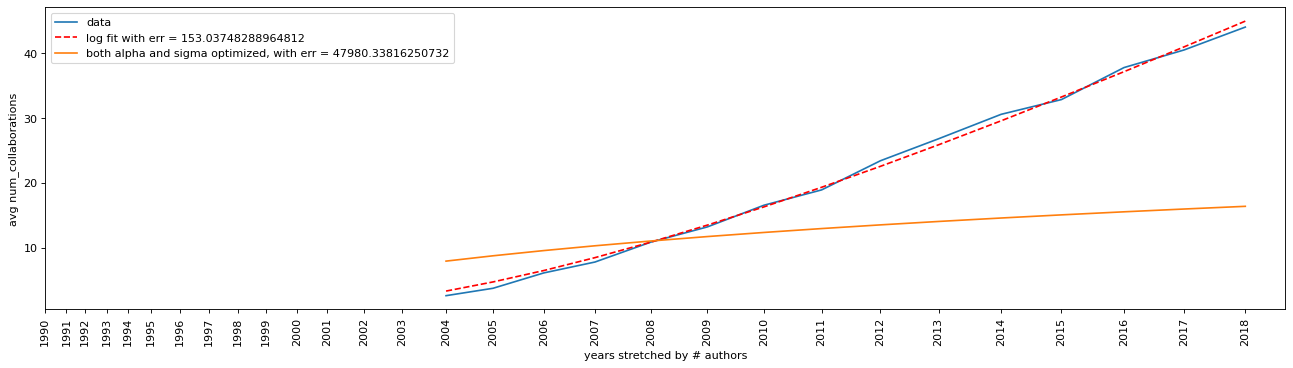

============================================================= starting year 2005 =============================================================


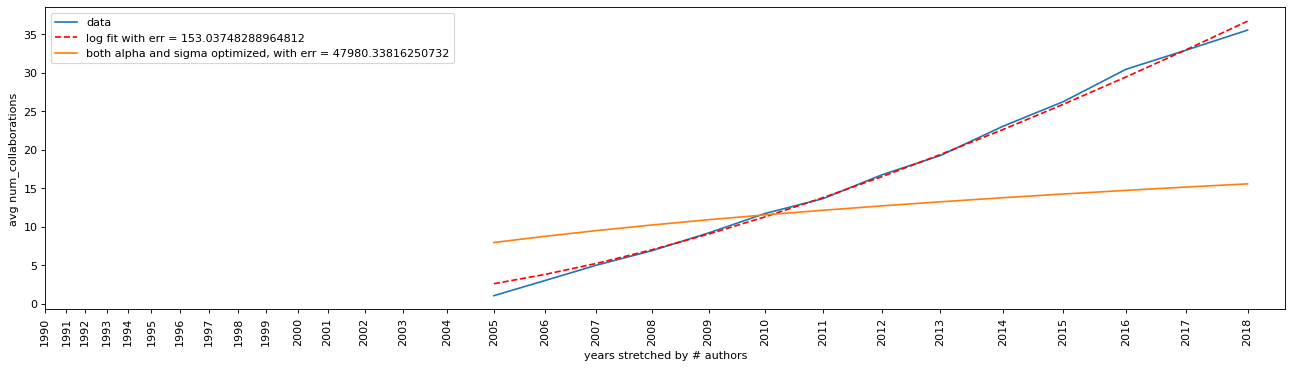

============================================================= starting year 2006 =============================================================


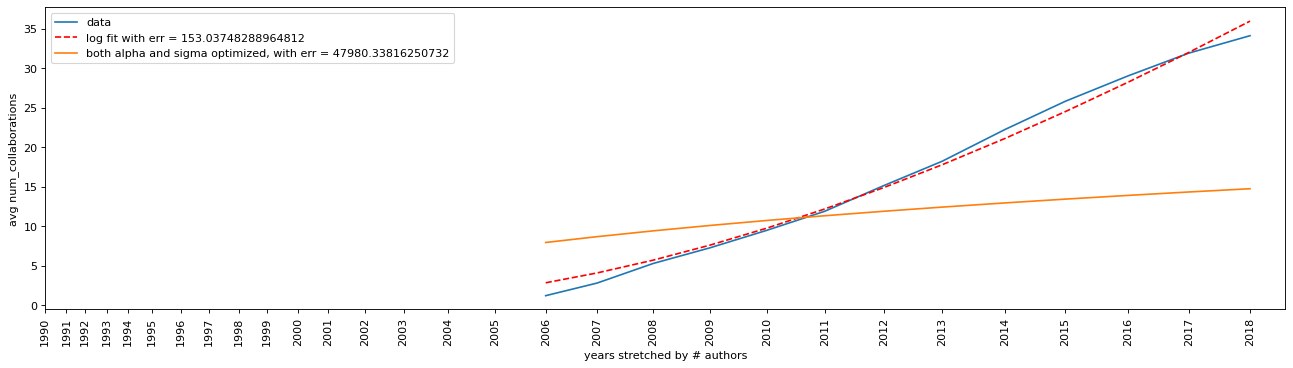

============================================================= starting year 2007 =============================================================


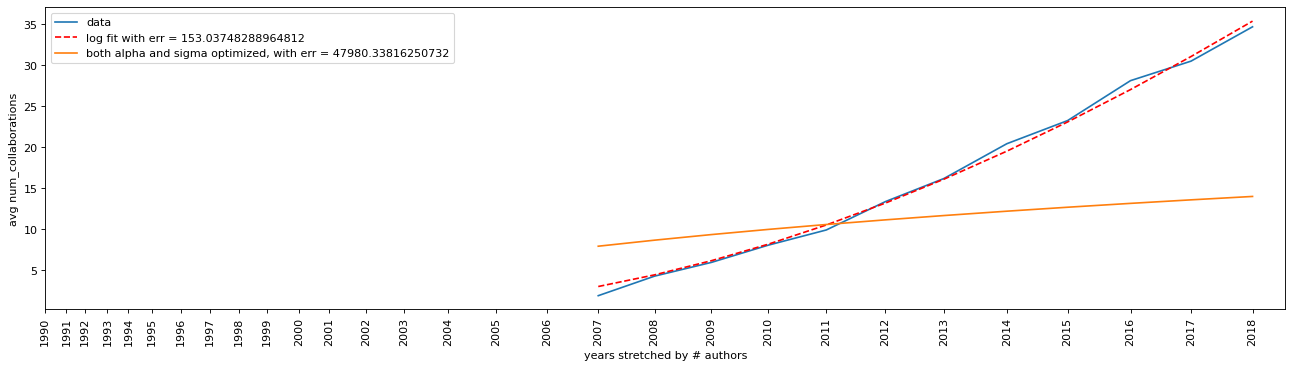

============================================================= starting year 2008 =============================================================


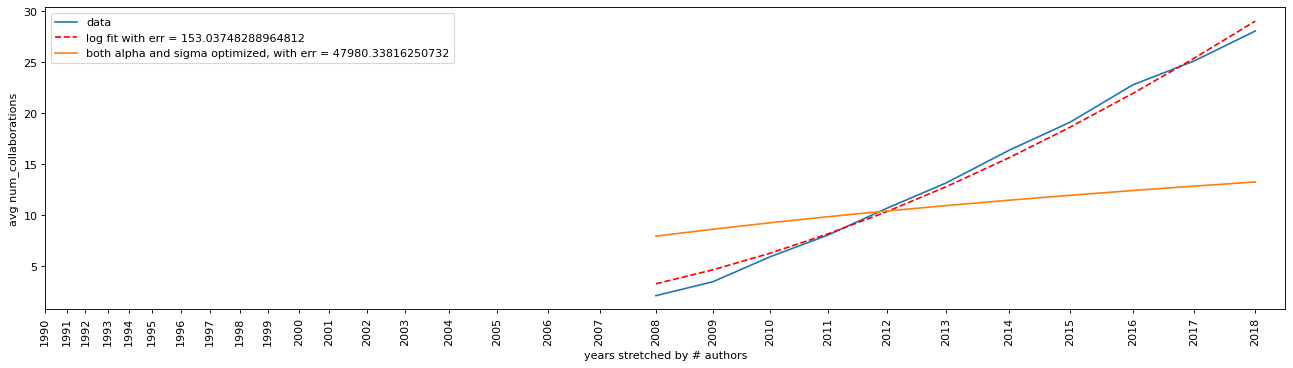

============================================================= starting year 2009 =============================================================


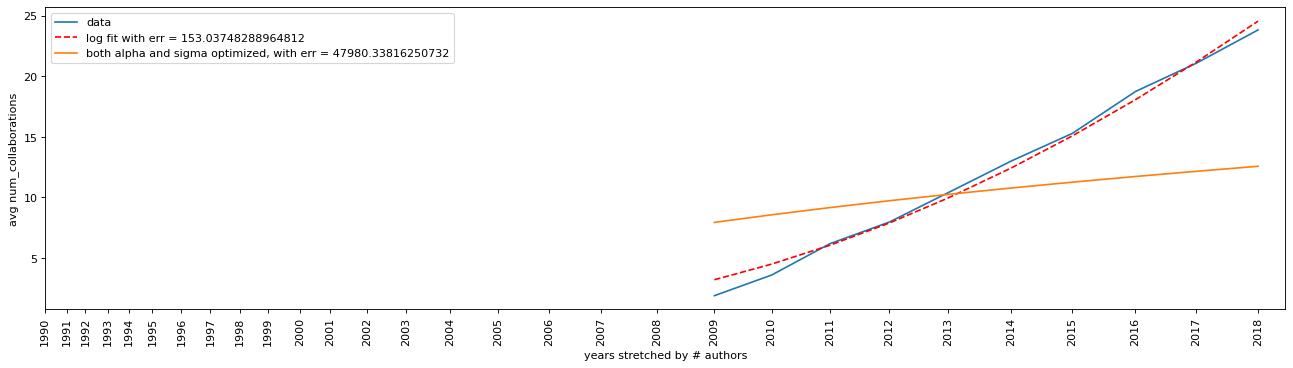

============================================================= starting year 2010 =============================================================


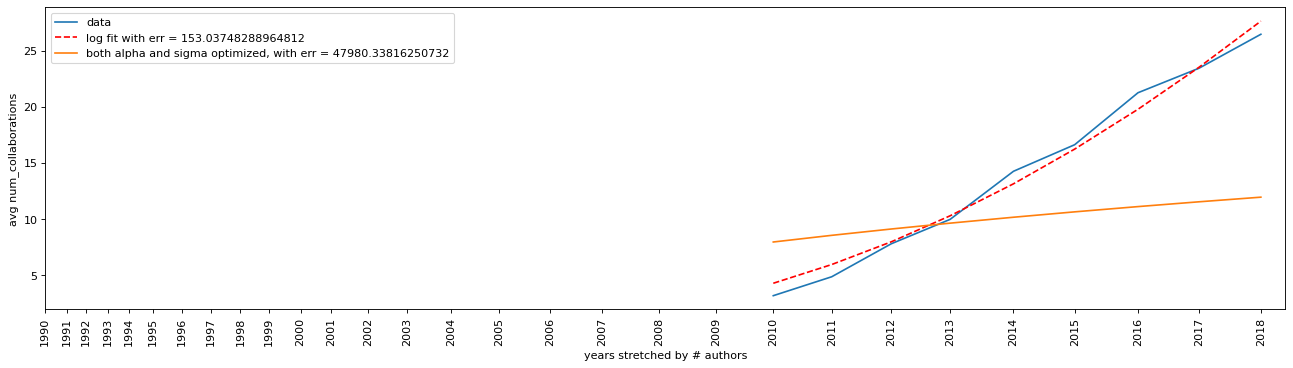

============================================================= starting year 2011 =============================================================


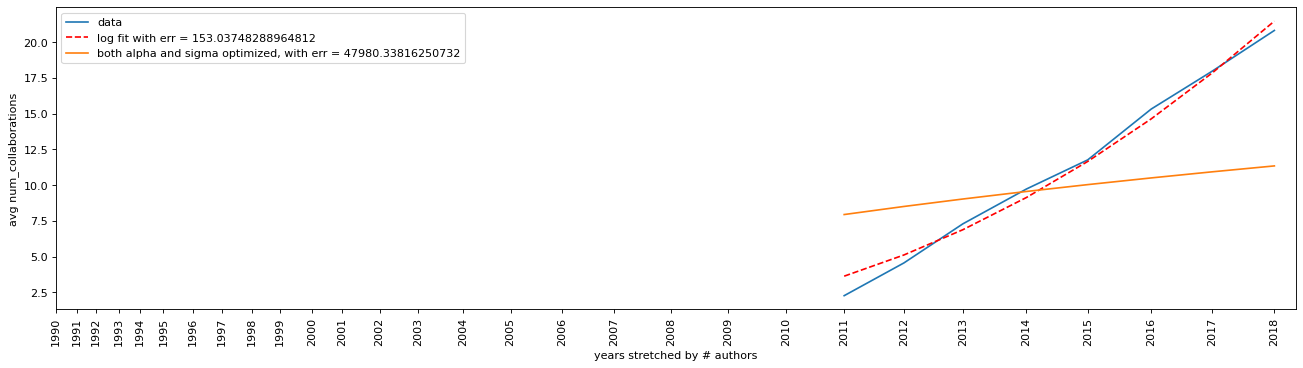

============================================================= starting year 2012 =============================================================


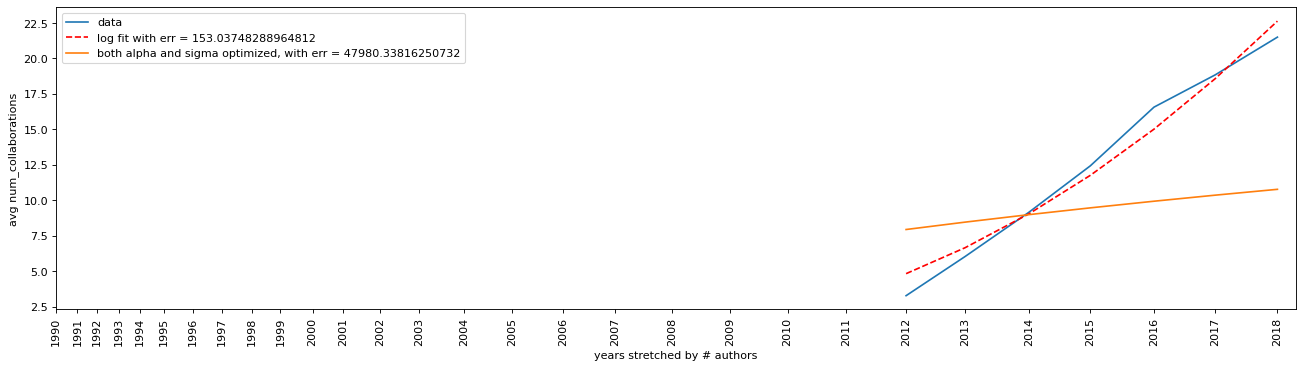

============================================================= starting year 2013 =============================================================


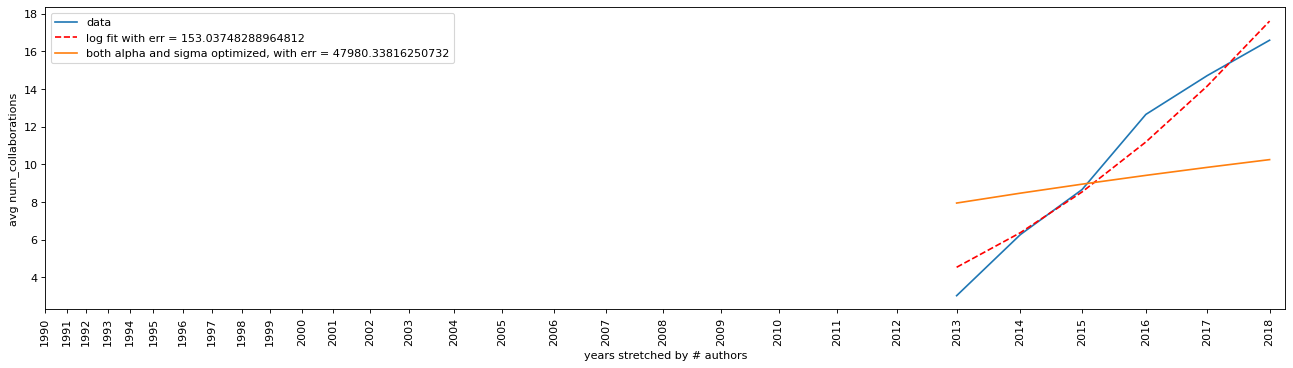

============================================================= starting year 2014 =============================================================


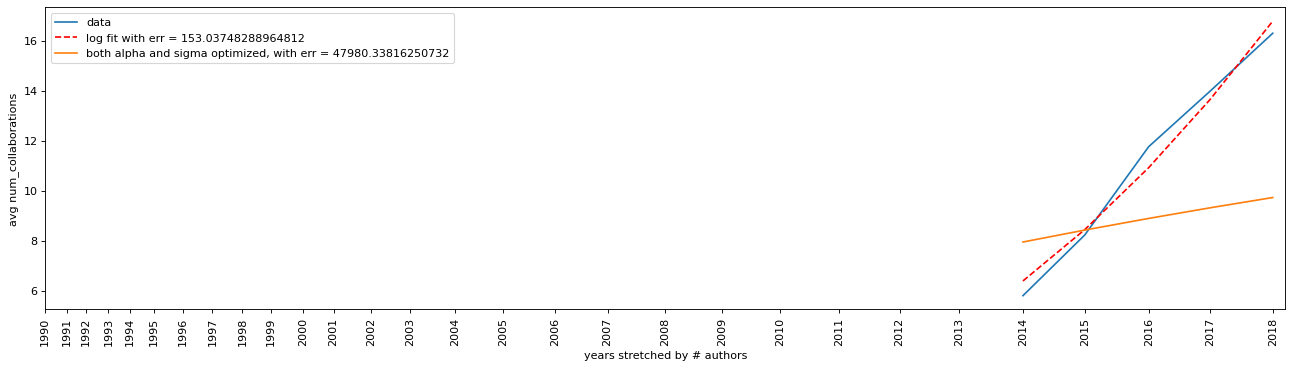

============================================================= starting year 2015 =============================================================


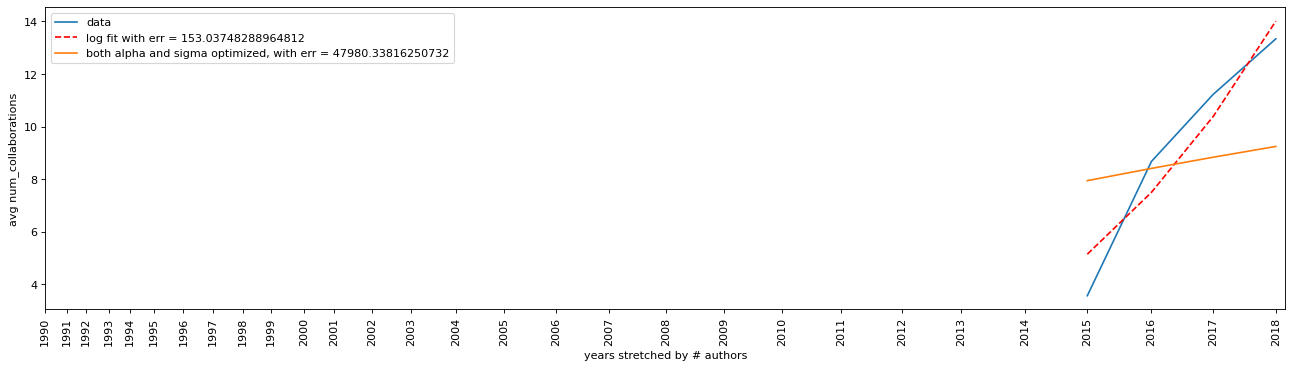

============================================================= starting year 2016 =============================================================


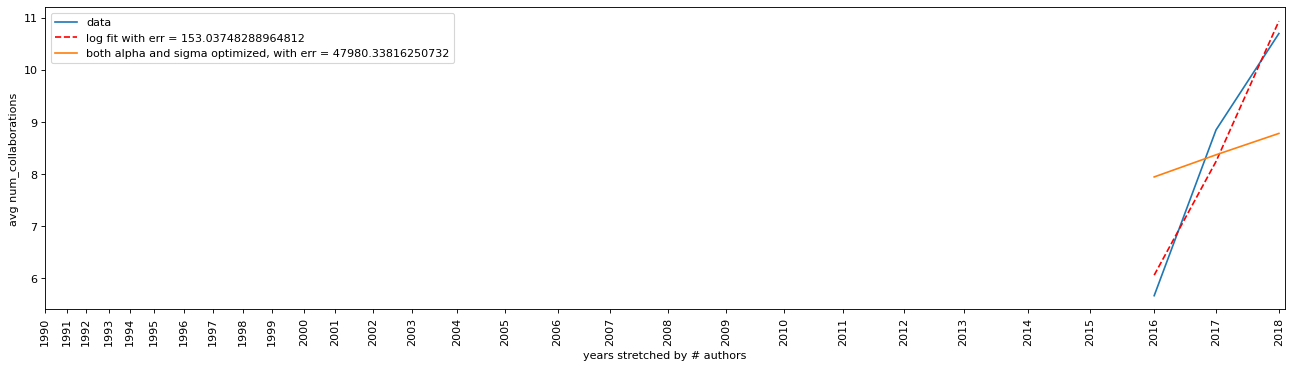

============================================================= starting year 2017 =============================================================


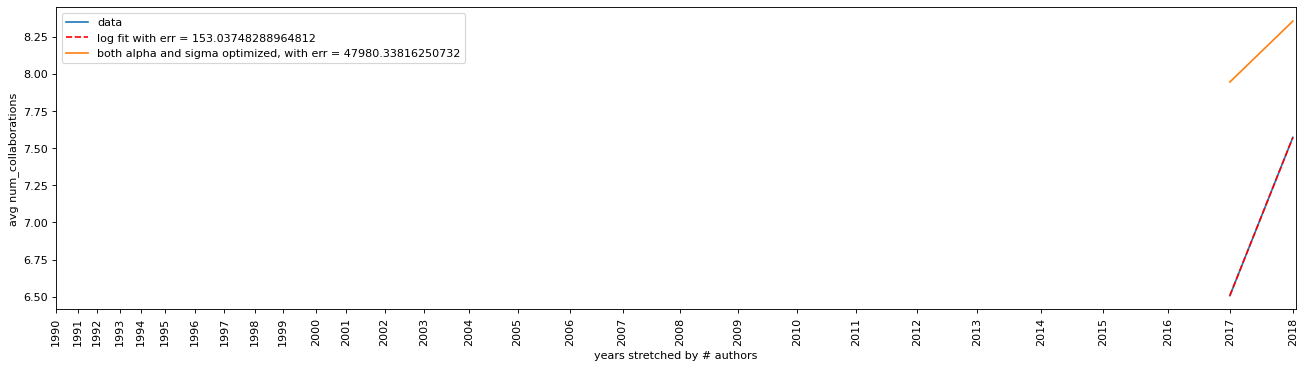

In [9]:
alphas  = []
sigmas = []

def func(t, a, sigma):
    return a* pow((np.log(t) + 1), sigma)

def plot_f_fit(xdata, ydata, curr_x):
    popt, pcov = curve_fit(func, [x/curr_x for x in xdata], ydata, maxfev=5000)
    alphas.append(popt[0])
    sigmas.append(popt[1])
    #print("alpha", popt[0], ", sigma", popt[1])
    return func([x/curr_x for x in xdata], *popt)

# Plot fitting function of average trajectories for each starting year and hole lenght stretched by new authors
for size in range(min_size, max_size+1):
    alphas  = []
    sigmas = []
    x_y_fit = {}
    
    print((' \033[1m' + "HOLE SIZE "+str(size) + '\033[0m ').center(150, '='))
    path = 'myDATA/10-splitted_by_year/'+str(size)+'_hole_size_splitted'
    if(os.path.exists(path)):
        for y in YEARS:
            file=path+'/'+y+'_collabs_by_starting_year.csv'
            if(os.path.exists(file) and y!="2018"):
                df_y = pd.read_csv(file)
                if(len(df_y)>0):
                    png_path = "myDATA/10-splitted_by_year/"+str(size)+"_hole_size_splitted/trajectories_avg_plt/"+"_holeSize_"+str(size)+"by_num_authors_log_fittings_all"+".png"

                    curr_x = get_tot_auths_num()[YEARS.index(y)]
                    x_axis, y_axis = get_f_by_auth(df_y)  
                    #print(y, end=" -> ")
                    fit_y = plot_f_fit(x_axis, y_axis, curr_x)
                    # print(y, fit_y)
                    x_y_fit[y] = {"x":x_axis, "y":y_axis, "fit_y":fit_y }
                    #print(x_axis)
    plt.figure(figsize=(20, 8), dpi=80)

    for y in YEARS[:-1]:
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["y"])
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["fit_y"], 'r--')
        
    plt.xlabel("years stretched by # authors")
    plt.ylabel("avg num_authors")
    plt.xticks(rotation='vertical')
    plt.xticks(get_tot_auths_num(), YEARS)

    plt.savefig(png_path)
    plt.show()
    data = []
    
    for i in range(len(YEARS) - 1):
        data.append([YEARS[i], alphas[i], sigmas[i]])
    print("total error for all fitted curves", tot_err_logfit(x_y_fit))
    
    
    
    plt.figure(figsize=(10, 5), dpi=80)
    plt.plot(get_tot_auths_num()[:-1], alphas, label="alpha")
    plt.plot(get_tot_auths_num()[:-1], sigmas, label="sigma")
    plt.xticks(get_tot_auths_num(), YEARS)
    plt.xticks(rotation='vertical')

    plt.legend()
    plt.show()
    print (tabulate(data, headers=["Sarting Year", "alpha", "sigma"]))
    
    initial_guess = [1, 1]
    result = optimize.minimize(f, initial_guess)
    fitted_params = result.x
    
    ## both optimized values 
    alpha = fitted_params[0]
    sigma = fitted_params[1]
    print("optimized", alpha, sigma)
    ## fixing alpha to the mean 
    # alpha_mean = np.mean(alphas) # mean
    # sigma1 = 1.5135571015789293 # for hole size 1

    ## fixing sigma to the mean 
    #sigma_mean = np.mean(sigmas) # mean 
    #alpha1 = 0.138066456038629  # for hole size 1
    
    for y in YEARS[:-1]:
        print((' \033[1m' + "starting year "+str(y) + '\033[0m ').center(150, '='))
        plt.figure(figsize=(20, 5), dpi=80)

        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["y"], label="data")
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["fit_y"], 'r--', label="log fit with err = "+tot_err_logfit(x_y_fit))
        plt.plot(x_y_fit[y]["x"], best_g(x_y_fit[y]["x"], alpha, sigma), label="both alpha and sigma optimized, with err = "+tot_err(alpha, sigma))
        #plt.plot(x_y_fit[y]["x"], best_g(x_y_fit[y]["x"], alpha_mean, sigma1), label="alpha fixed to mean and sigma optimized , with total err = "+tot_err(alpha_mean, sigma1))
        #plt.plot(x_y_fit[y]["x"], best_g(x_y_fit[y]["x"], alpha1, sigma_mean), label="sigma fixed to mean and alpha optimized , with total err = "+tot_err(alpha1, sigma_mean))

        plt.xlabel("years stretched by # authors")
        plt.ylabel("avg num_collaborations")
        plt.xticks(rotation='vertical')
        plt.xticks(get_tot_auths_num(), YEARS)
        plt.legend()
        
        fig_path = "myDATA/10-splitted_by_year/"+str(size)+"_hole_size_splitted/trajectories_avg_plt/" + str(y) + "_by_num_authors_alpha_sigma_log_fitting_generalized.png"
        plt.savefig(fig_path)
        plt.show()
    
    break

================================================================ HOLE SIZE 1 =================================================================


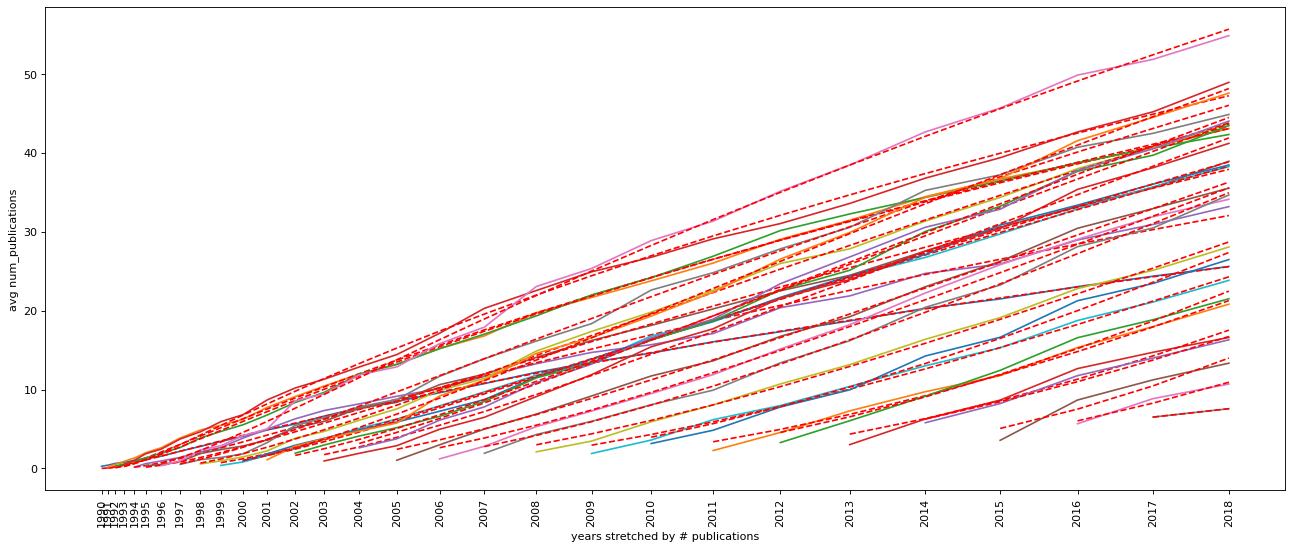

total error for all fitted curves 120.41018973961907


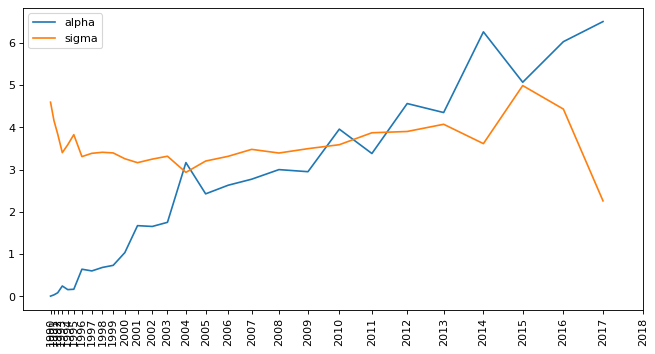

  Sarting Year       alpha    sigma
--------------  ----------  -------
          1990  0.00551516  4.59809
          1991  0.0349819   4.16424
          1992  0.0850012   3.8431
          1993  0.245233    3.40303
          1994  0.159626    3.5898
          1995  0.167764    3.82928
          1996  0.642802    3.30939
          1997  0.602234    3.38744
          1998  0.684782    3.41185
          1999  0.734211    3.39643
          2000  1.0359      3.25903
          2001  1.67437     3.16569
          2002  1.65517     3.24992
          2003  1.75325     3.31849
          2004  3.16774     2.93607
          2005  2.42736     3.20417
          2006  2.63132     3.31617
          2007  2.77443     3.48106
          2008  3.00144     3.39425
          2009  2.95219     3.49735
          2010  3.9595      3.59108
          2011  3.38277     3.87403
          2012  4.56588     3.90441
          2013  4.35292     4.07503
          2014  6.26392     3.61678
          2015  5.0704      4.

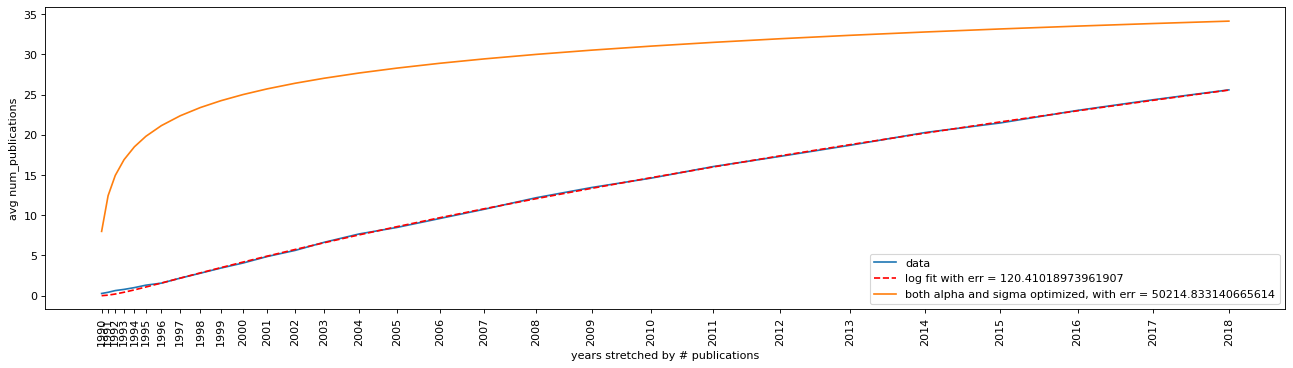

============================================================= starting year 1991 =============================================================


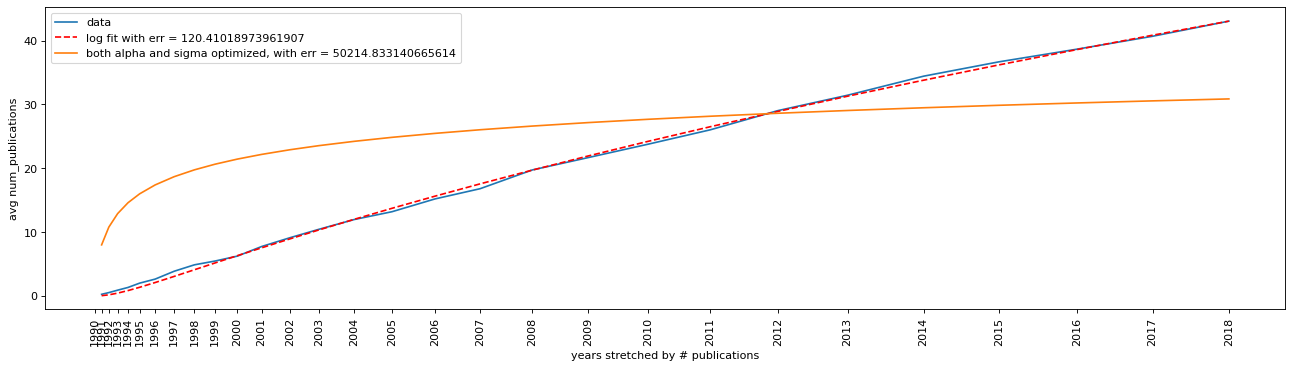

============================================================= starting year 1992 =============================================================


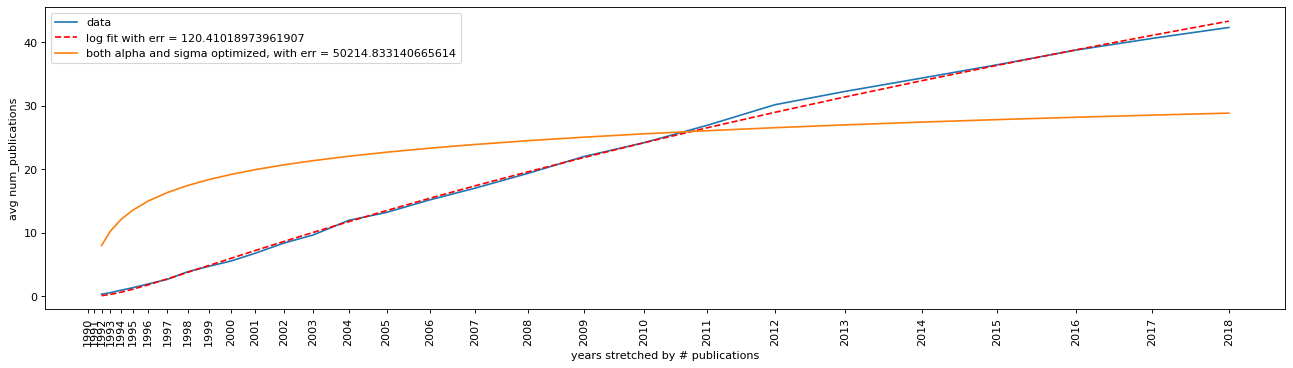

============================================================= starting year 1993 =============================================================


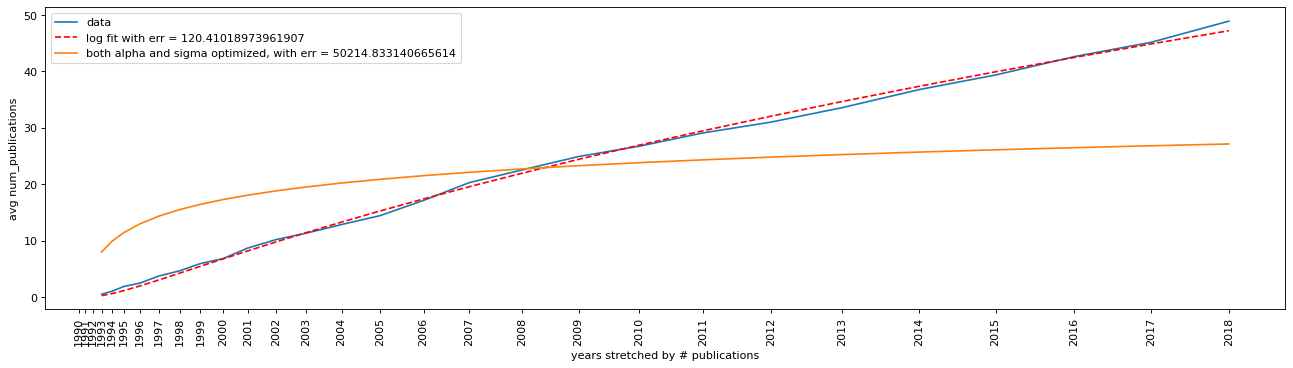

============================================================= starting year 1994 =============================================================


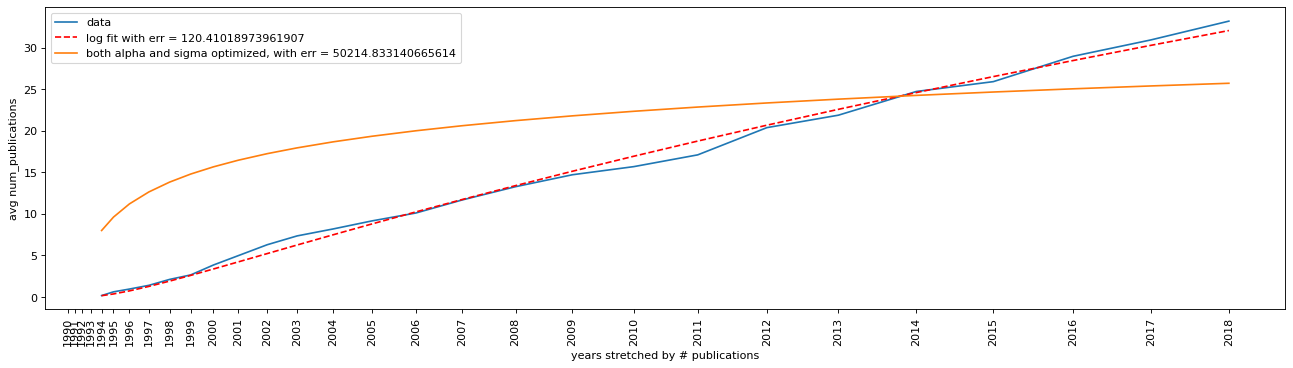

============================================================= starting year 1995 =============================================================


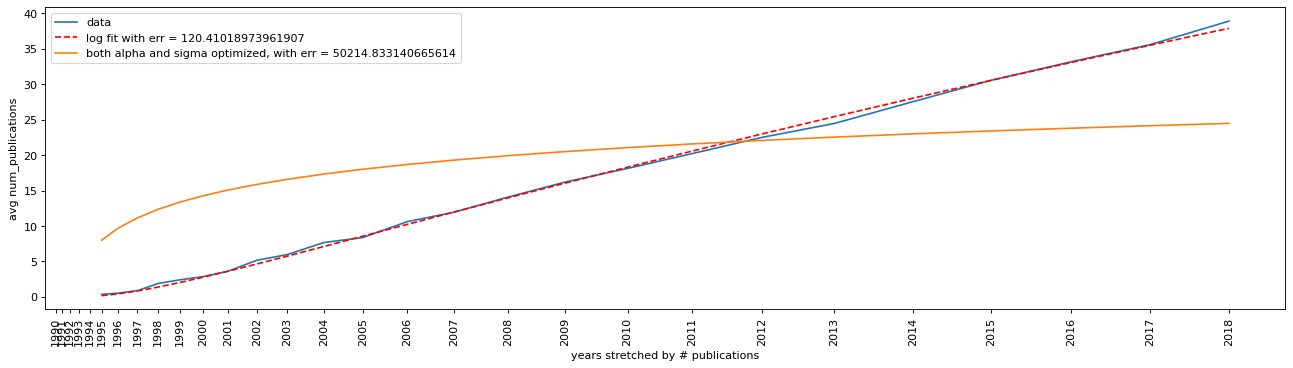

============================================================= starting year 1996 =============================================================


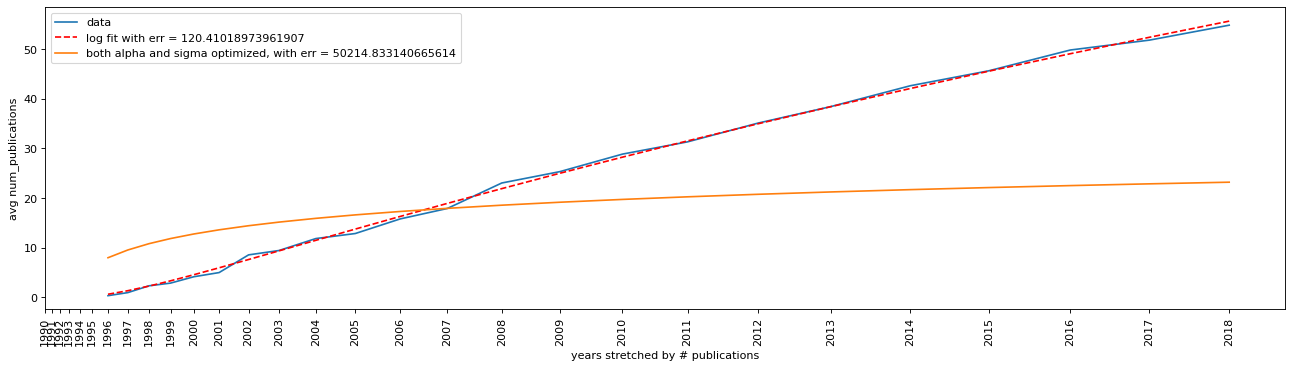

============================================================= starting year 1997 =============================================================


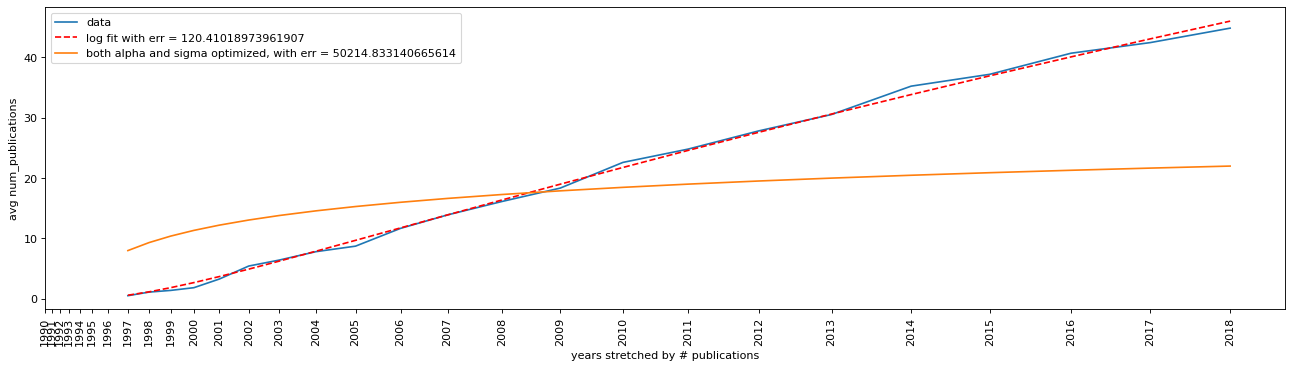

============================================================= starting year 1998 =============================================================


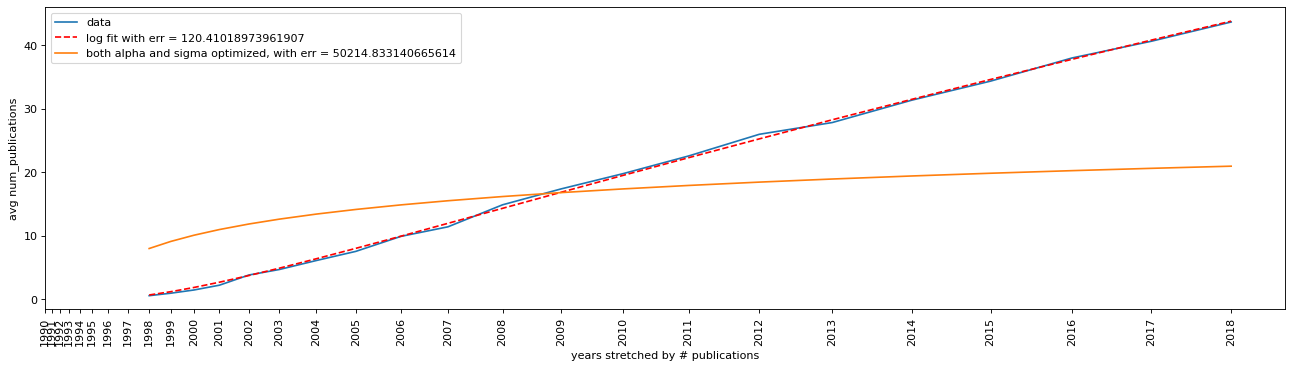

============================================================= starting year 1999 =============================================================


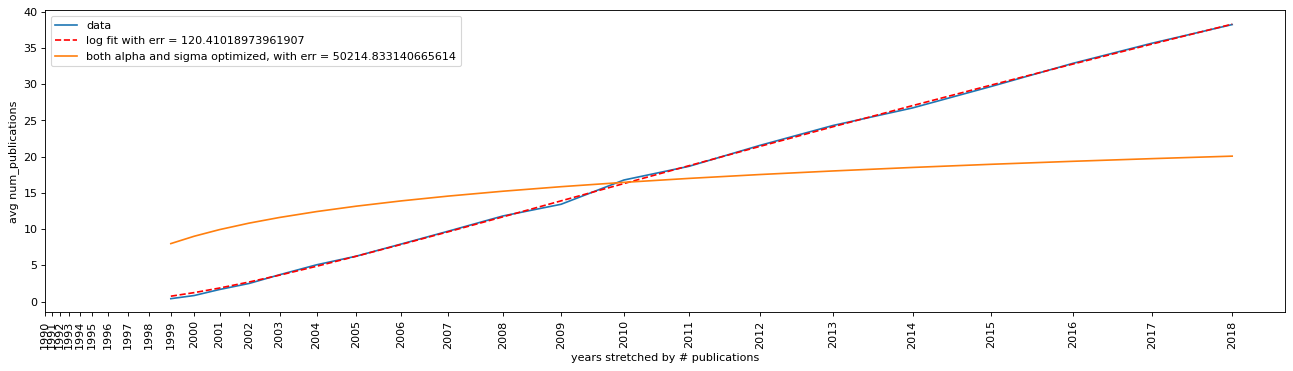

============================================================= starting year 2000 =============================================================


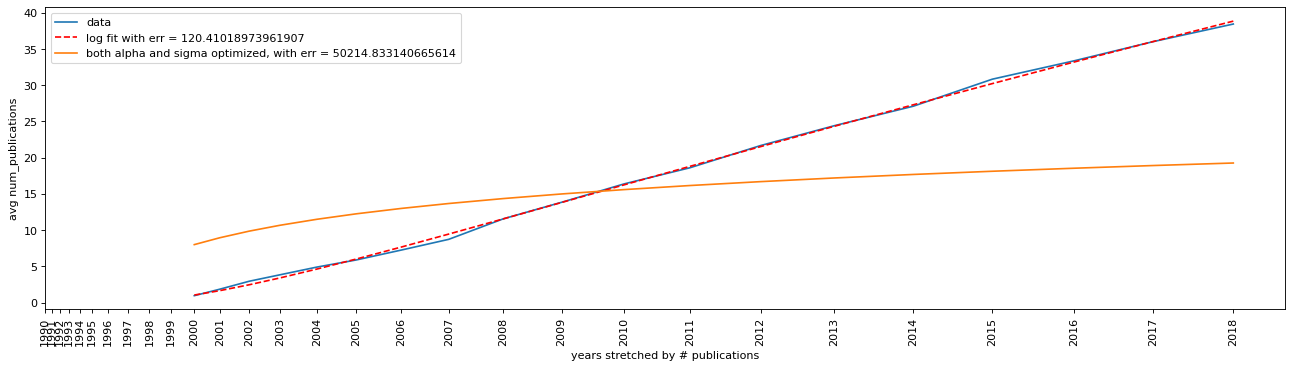

============================================================= starting year 2001 =============================================================


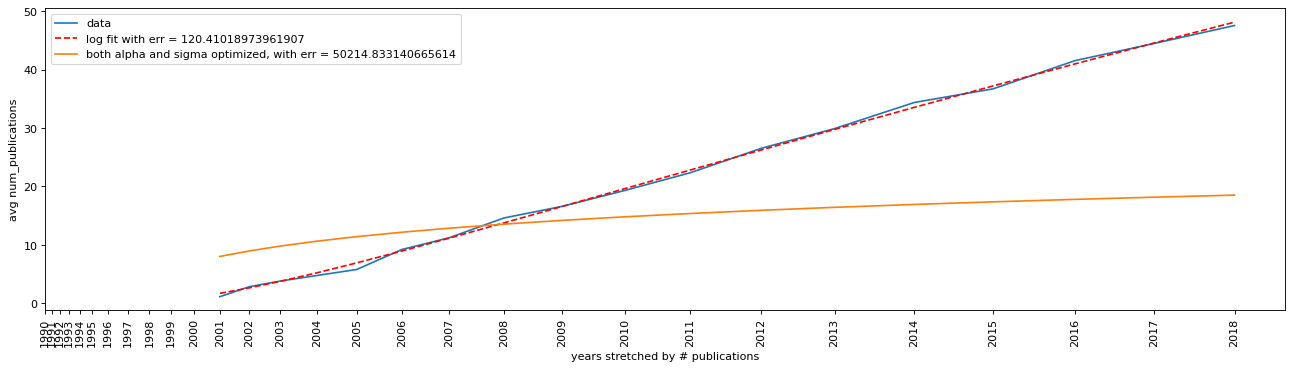

============================================================= starting year 2002 =============================================================


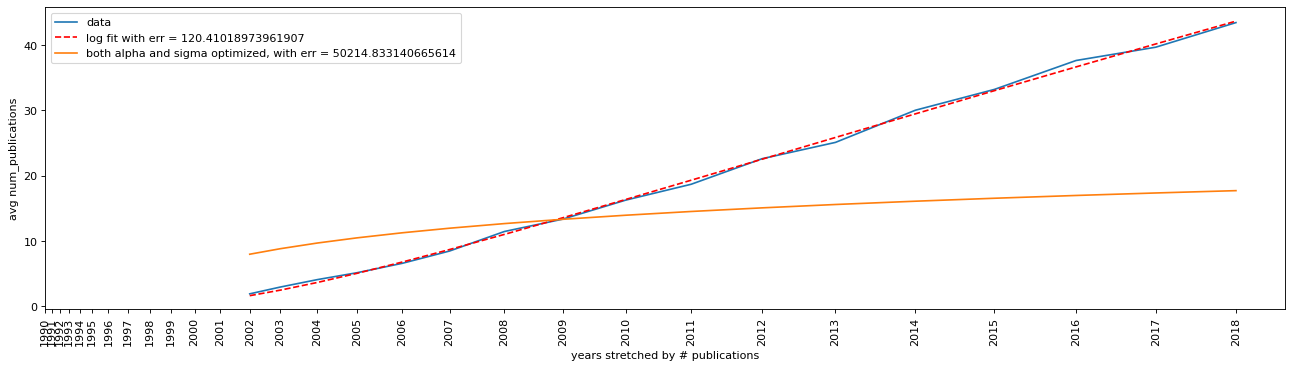

============================================================= starting year 2003 =============================================================


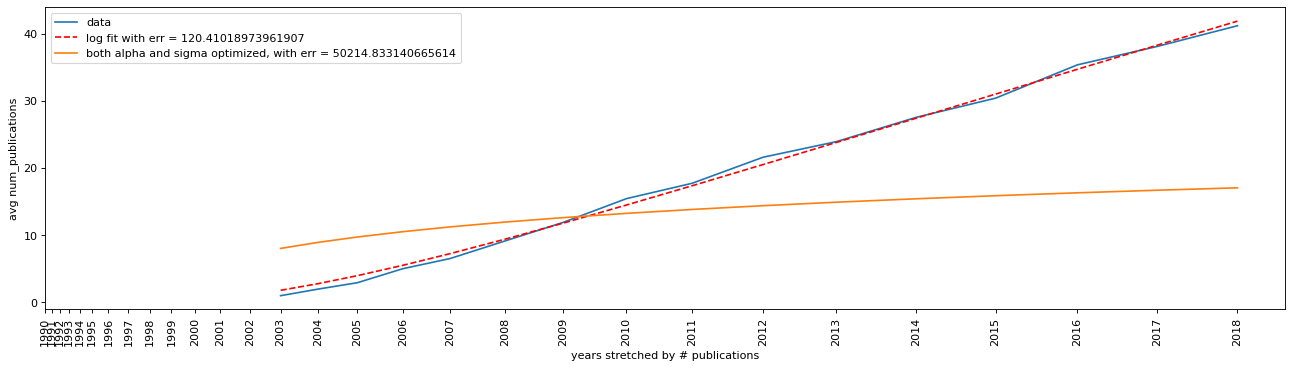

============================================================= starting year 2004 =============================================================


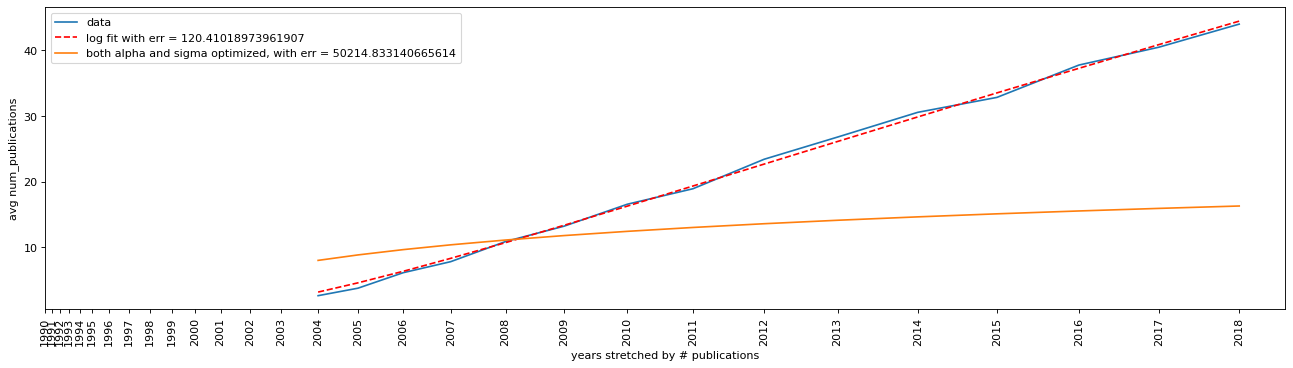

============================================================= starting year 2005 =============================================================


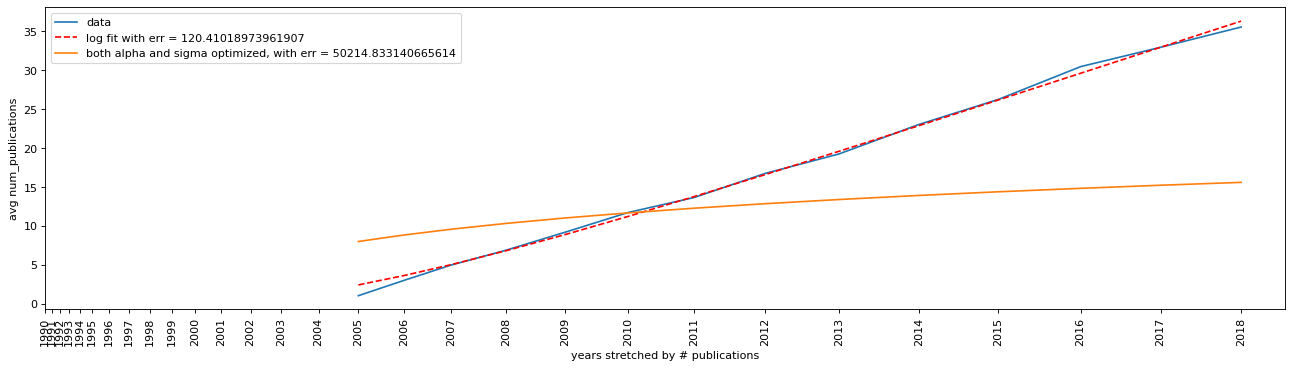

============================================================= starting year 2006 =============================================================


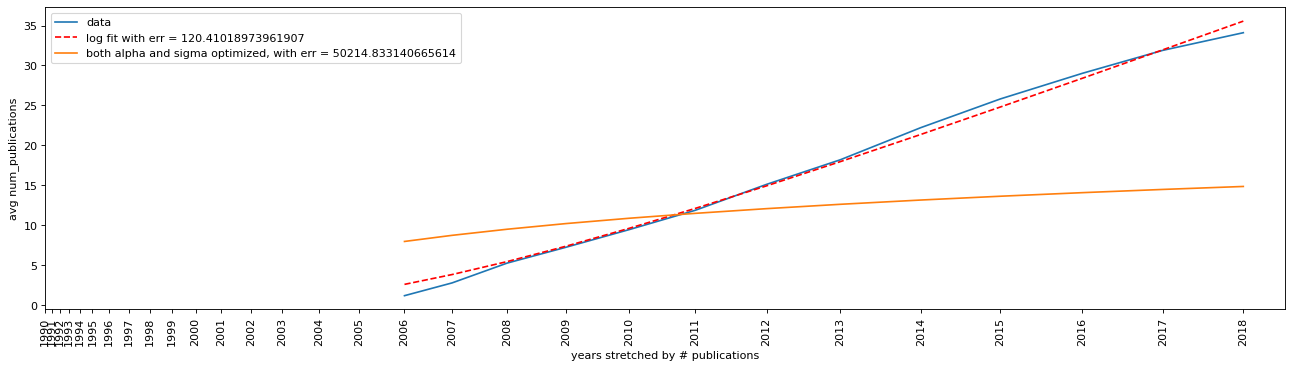

============================================================= starting year 2007 =============================================================


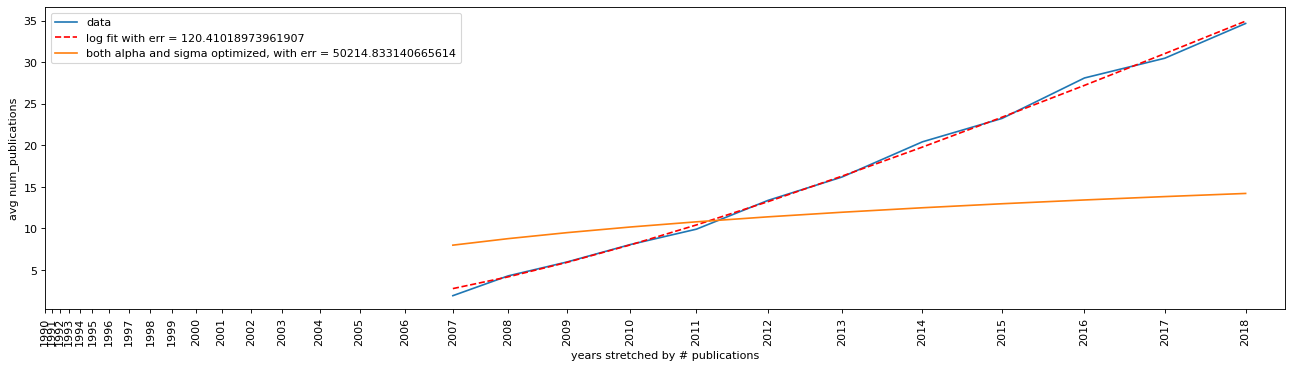

============================================================= starting year 2008 =============================================================


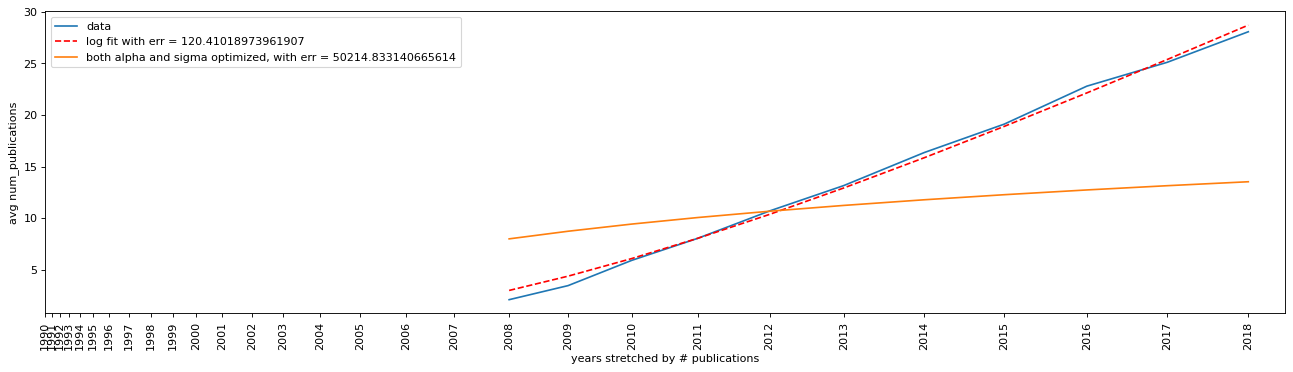

============================================================= starting year 2009 =============================================================


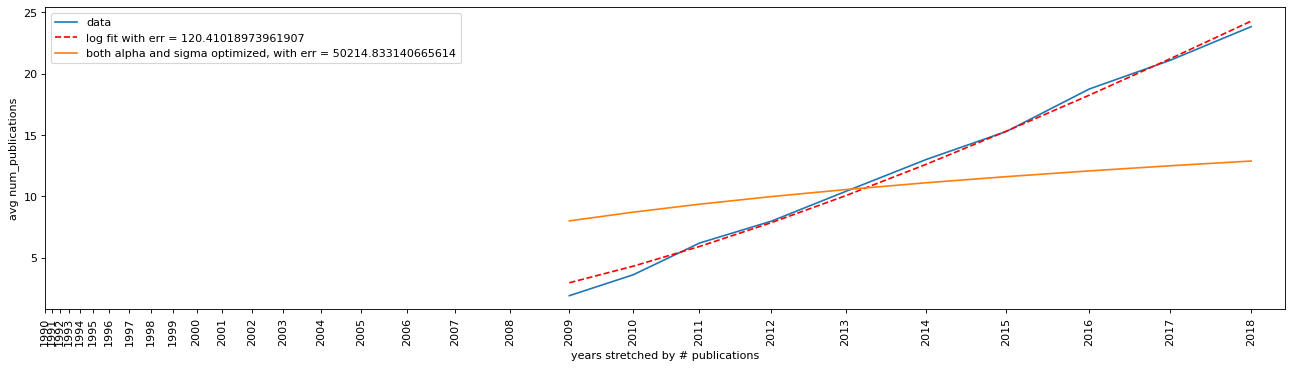

============================================================= starting year 2010 =============================================================


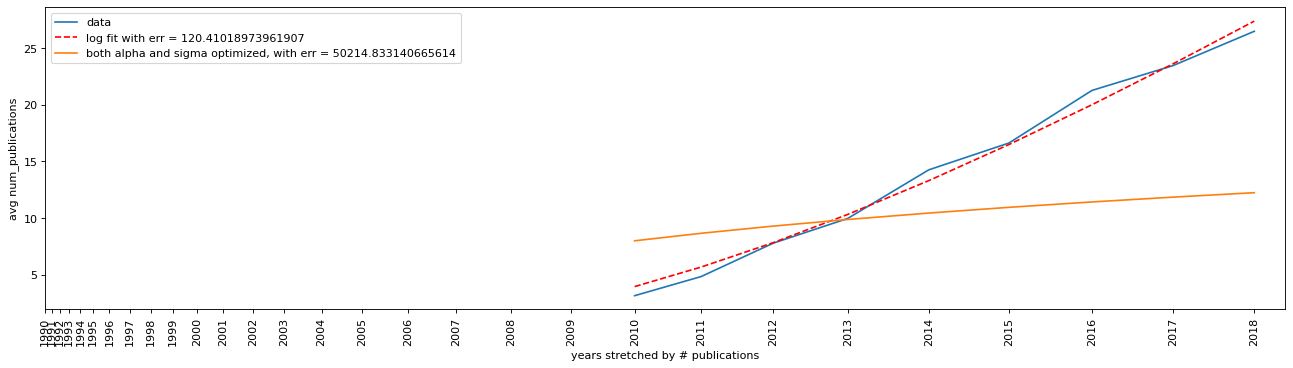

============================================================= starting year 2011 =============================================================


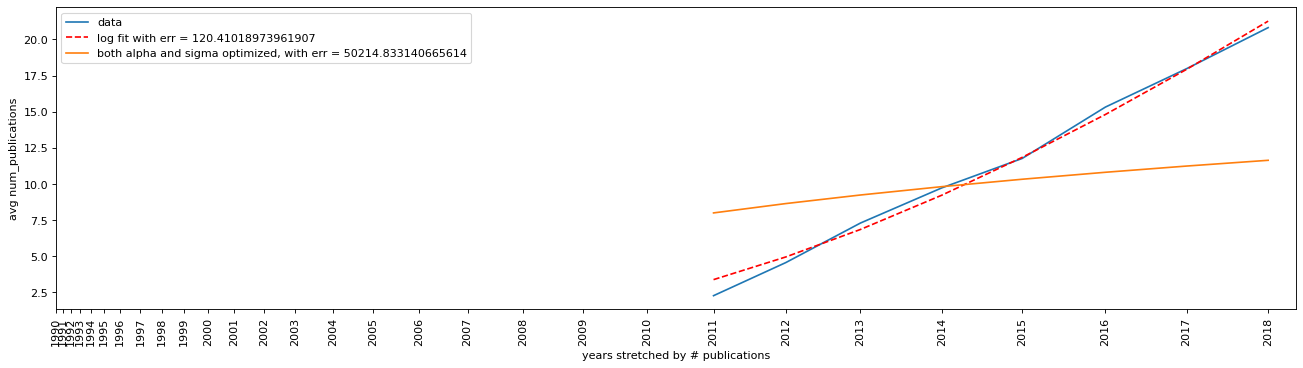

============================================================= starting year 2012 =============================================================


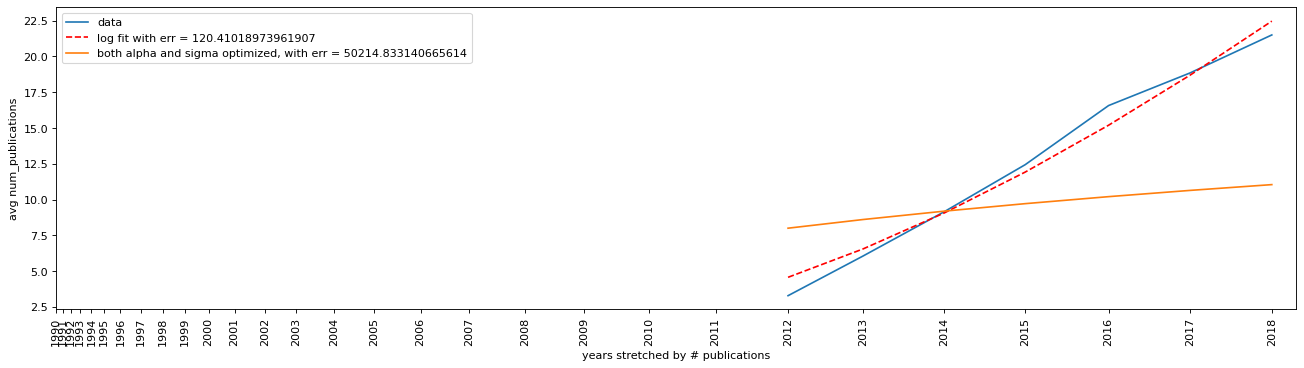

============================================================= starting year 2013 =============================================================


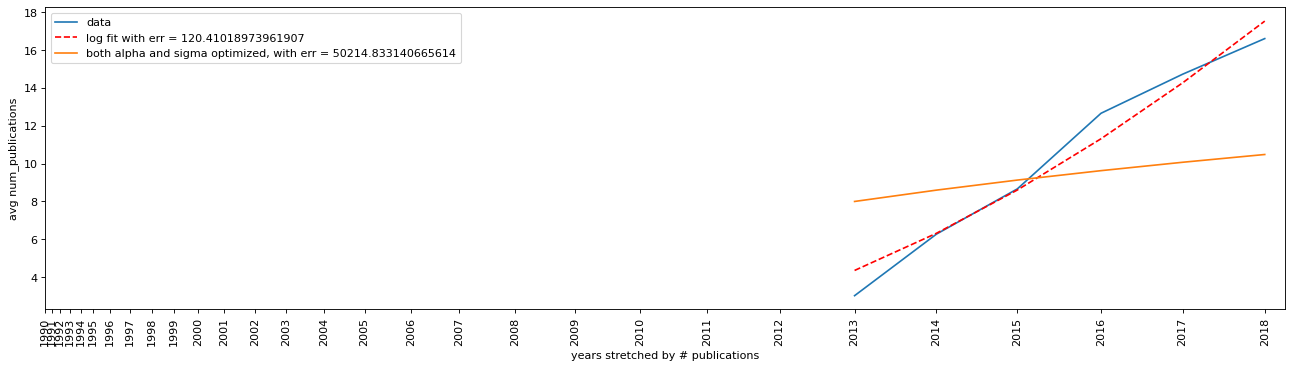

============================================================= starting year 2014 =============================================================


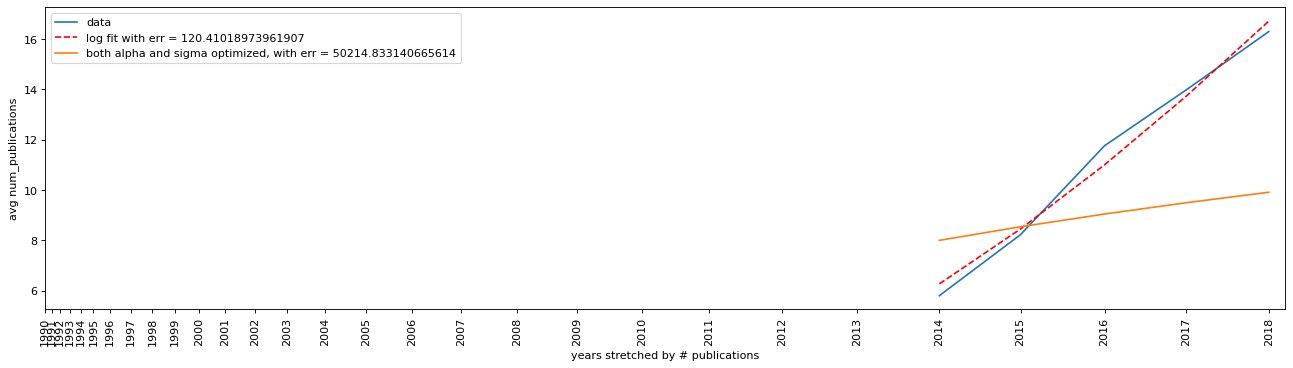

============================================================= starting year 2015 =============================================================


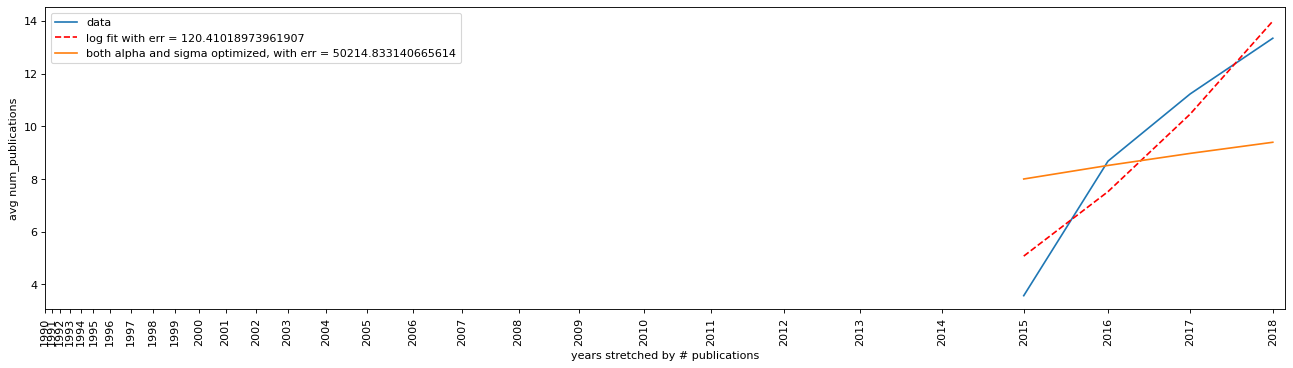

============================================================= starting year 2016 =============================================================


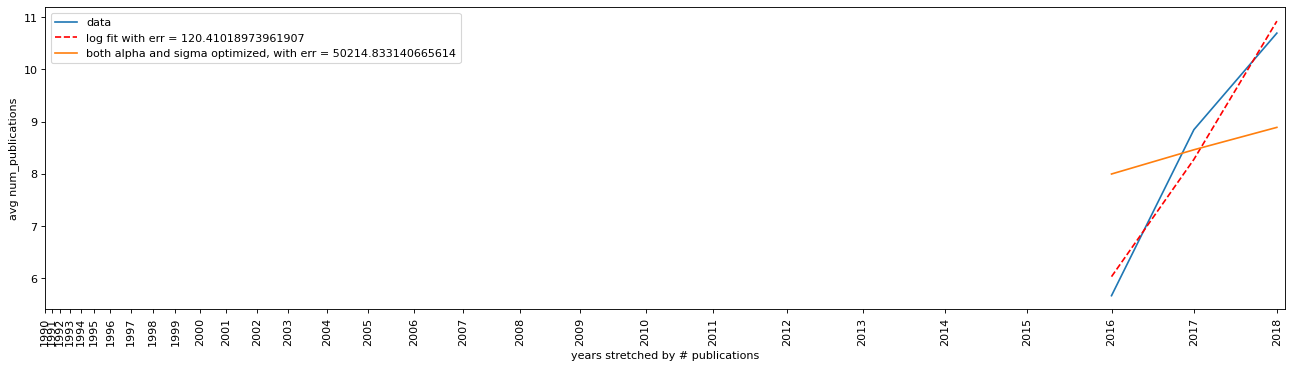

============================================================= starting year 2017 =============================================================


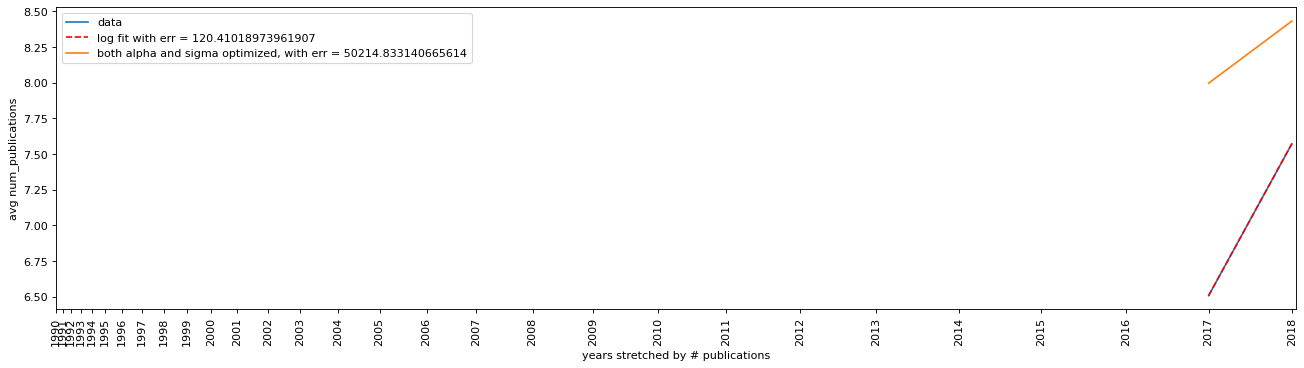

In [10]:
alphas  = []
sigmas = []

def func(t, a, sigma):
    return a* pow((np.log(t) + 1), sigma)

def plot_f_fit(xdata, ydata, curr_x):
    popt, pcov = curve_fit(func, [x/curr_x for x in xdata], ydata, maxfev=5000)
    alphas.append(popt[0])
    sigmas.append(popt[1])
    #print("alpha", popt[0], ", sigma", popt[1])
    return func([x/curr_x for x in xdata], *popt)

# Plot fitting function of average trajectories for each starting year and hole lenght stretched by new publications
for size in range(min_size, max_size+1):
    alphas  = []
    sigmas = []
    x_y_fit = {}
    
    print((' \033[1m' + "HOLE SIZE "+str(size) + '\033[0m ').center(150, '='))
    path = 'myDATA/10-splitted_by_year/'+str(size)+'_hole_size_splitted'
    if(os.path.exists(path)):
        for y in YEARS:
            file=path+'/'+y+'_collabs_by_starting_year.csv'
            if(os.path.exists(file) and y!="2018"):
                df_y = pd.read_csv(file)
                if(len(df_y)>0):
                    png_path = "myDATA/10-splitted_by_year/"+str(size)+"_hole_size_splitted/trajectories_avg_plt/"+"_holeSize_"+str(size)+"by_num_publications_log_fittings_all"+".png"

                    curr_x = get_tot_pubs_num()[YEARS.index(y)]
                    x_axis, y_axis = get_f_by_pubs(df_y)  
                    #print(y, end=" -> ")
                    fit_y = plot_f_fit(x_axis, y_axis, curr_x)
                    
                    x_y_fit[y] = {"x":x_axis, "y":y_axis, "fit_y":fit_y }
    plt.figure(figsize=(20, 8), dpi=80)

    for y in YEARS[:-1]:
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["y"])
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["fit_y"], 'r--')
        
    plt.xlabel("years stretched by # publications")
    plt.ylabel("avg num_publications")
    plt.xticks(rotation='vertical')
    plt.xticks(get_tot_pubs_num(), YEARS)

    plt.savefig(png_path)
    plt.show()
    data = []
    
    for i in range(len(YEARS) - 1):
        data.append([YEARS[i], alphas[i], sigmas[i]])
    print("total error for all fitted curves", tot_err_logfit(x_y_fit))
    
    
    
    plt.figure(figsize=(10, 5), dpi=80)
    plt.plot(get_tot_pubs_num()[:-1], alphas, label="alpha")
    plt.plot(get_tot_pubs_num()[:-1], sigmas, label="sigma")
    plt.xticks(get_tot_pubs_num(), YEARS)
    plt.xticks(rotation='vertical')

    plt.legend()
    plt.show()
    print (tabulate(data, headers=["Sarting Year", "alpha", "sigma"]))
    
    initial_guess = [1, 1]
    result = optimize.minimize(f, initial_guess)
    fitted_params = result.x
    
    ## both optimized values 
    alpha = fitted_params[0]
    sigma = fitted_params[1]

    ## fixing alpha to the mean 
    # alpha_mean = np.mean(alphas) # mean
    # sigma1 = 1.5135571015789293 # for hole size 1

    ## fixing sigma to the mean 
    #sigma_mean = np.mean(sigmas) # mean 
    #alpha1 = 0.138066456038629  # for hole size 1
    
    for y in YEARS[:-1]:
        print((' \033[1m' + "starting year "+str(y) + '\033[0m ').center(150, '='))
        plt.figure(figsize=(20, 5), dpi=80)

        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["y"], label="data")
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["fit_y"], 'r--', label="log fit with err = "+tot_err_logfit(x_y_fit))
        plt.plot(x_y_fit[y]["x"], best_g(x_y_fit[y]["x"], alpha, sigma), label="both alpha and sigma optimized, with err = "+tot_err(alpha, sigma))
        #plt.plot(x_y_fit[y]["x"], best_g(x_y_fit[y]["x"], alpha_mean, sigma1), label="alpha fixed to mean and sigma optimized , with total err = "+tot_err(alpha_mean, sigma1))
        #plt.plot(x_y_fit[y]["x"], best_g(x_y_fit[y]["x"], alpha1, sigma_mean), label="sigma fixed to mean and alpha optimized , with total err = "+tot_err(alpha1, sigma_mean))

        plt.xlabel("years stretched by # publications")
        plt.ylabel("avg num_publications")
        plt.xticks(rotation='vertical')
        plt.xticks(get_tot_pubs_num(), YEARS)
        plt.legend()
        
        fig_path = "myDATA/10-splitted_by_year/"+str(size)+"_hole_size_splitted/trajectories_avg_plt/" + str(y) + "_by_num_publications_alpha_sigma_log_fitting_generalized.png"
        plt.savefig(fig_path)
        plt.show()
    
    break